# Semantic Environment Analysis: ἀρσενοκοῖται

This notebook analyzes the semantic environment of the NT lexeme
ἀρσενοκοῖται (arsenokoitai), beginning with its occurrence in NT vice lists.

The goal is to characterize contextual and semantic neighbors *prior* to
assigning meaning or engaging in interpretive debates.

Phase 1 focuses exclusively on NT vice-list contexts (1 Cor 6:9; 1 Tim 1:10)
as a calibration step before expanding the corpus.

## Corpus Preparation (Preliminary)

Prior to the analyses in this notebook, a preparatory corpus was assembled
consisting of the following New Testament texts:

- Romans
- 1 Corinthians
- 2 Corinthians
- 1 Timothy
- 2 Timothy

These texts were selected because they contain:
- explicit moral discourse,
- multiple vice lists,
- and all New Testament occurrences of the lexeme under study
  (ἀρσενοκοῖται), as well as closely related moral terminology.

At this stage, the corpus is restricted to the New Testament only.
Non-canonical literature, patristic sources, and later interpretive
traditions are intentionally excluded and will be introduced only after
method calibration.

This preparatory step involved text acquisition and basic segmentation
only. No semantic interpretation, lexical definition, or theological
inference was performed during corpus assembly.

In [24]:
from pathlib import Path
import pandas as pd
import re

BASE_DIR = Path.cwd()

TXT_DIR = (BASE_DIR 
           / "data"
           / "raw"
           / "SBLGNT"
           / "data"
           / "SBLGNT"
           / "text")

print("TXT_DIR:", TXT_DIR)
print("Exists?:", TXT_DIR.exists())
print("Files found:", list(TXT_DIR.glob("*.txt"))[:10])

TXT_DIR: C:\Users\rache\Documents\Biblical Semantic Project\data\raw\SBLGNT\data\SBLGNT\text
Exists?: True
Files found: [WindowsPath('C:/Users/rache/Documents/Biblical Semantic Project/data/raw/SBLGNT/data/SBLGNT/text/1Cor.txt'), WindowsPath('C:/Users/rache/Documents/Biblical Semantic Project/data/raw/SBLGNT/data/SBLGNT/text/1John.txt'), WindowsPath('C:/Users/rache/Documents/Biblical Semantic Project/data/raw/SBLGNT/data/SBLGNT/text/1Pet.txt'), WindowsPath('C:/Users/rache/Documents/Biblical Semantic Project/data/raw/SBLGNT/data/SBLGNT/text/1Thess.txt'), WindowsPath('C:/Users/rache/Documents/Biblical Semantic Project/data/raw/SBLGNT/data/SBLGNT/text/1Tim.txt'), WindowsPath('C:/Users/rache/Documents/Biblical Semantic Project/data/raw/SBLGNT/data/SBLGNT/text/2Cor.txt'), WindowsPath('C:/Users/rache/Documents/Biblical Semantic Project/data/raw/SBLGNT/data/SBLGNT/text/2John.txt'), WindowsPath('C:/Users/rache/Documents/Biblical Semantic Project/data/raw/SBLGNT/data/SBLGNT/text/2Pet.txt'), Win

In [25]:
sample_file = next(TXT_DIR.glob("*.txt"))
print("Sample file:", sample_file)

with sample_file.open(encoding="utf-8") as f:
    for i, line in enumerate(f):
        if i >= 10:
            break
        print(repr(line.strip()))

Sample file: C:\Users\rache\Documents\Biblical Semantic Project\data\raw\SBLGNT\data\SBLGNT\text\1Cor.txt
'ΠΡΟΣ ΚΟΡΙΝΘΙΟΥΣ Α'
'1Cor 1:1\tΠαῦλος κλητὸς ἀπόστολος ⸂Χριστοῦ Ἰησοῦ⸃ διὰ θελήματος θεοῦ καὶ Σωσθένης ὁ ἀδελφὸς'
'1Cor 1:2\tτῇ ἐκκλησίᾳ τοῦ θεοῦ, ⸂ἡγιασμένοις ἐν Χριστῷ Ἰησοῦ, τῇ οὔσῃ ἐν Κορίνθῳ,⸃ κλητοῖς ἁγίοις, σὺν πᾶσιν τοῖς ἐπικαλουμένοις τὸ ὄνομα τοῦ κυρίου ἡμῶν Ἰησοῦ Χριστοῦ ἐν παντὶ τόπῳ ⸀αὐτῶν καὶ ἡμῶν·'
'1Cor 1:3\tχάρις ὑμῖν καὶ εἰρήνη ἀπὸ θεοῦ πατρὸς ἡμῶν καὶ κυρίου Ἰησοῦ Χριστοῦ.'
'1Cor 1:4\tΕὐχαριστῶ τῷ θεῷ ⸀μου πάντοτε περὶ ὑμῶν ἐπὶ τῇ χάριτι τοῦ θεοῦ τῇ δοθείσῃ ὑμῖν ἐν Χριστῷ Ἰησοῦ,'
'1Cor 1:5\tὅτι ἐν παντὶ ἐπλουτίσθητε ἐν αὐτῷ, ἐν παντὶ λόγῳ καὶ πάσῃ γνώσει,'
'1Cor 1:6\tκαθὼς τὸ μαρτύριον τοῦ Χριστοῦ ἐβεβαιώθη ἐν ὑμῖν,'
'1Cor 1:7\tὥστε ὑμᾶς μὴ ὑστερεῖσθαι ἐν μηδενὶ χαρίσματι, ἀπεκδεχομένους τὴν ἀποκάλυψιν τοῦ κυρίου ἡμῶν Ἰησοῦ Χριστοῦ·'
'1Cor 1:8\tὃς καὶ βεβαιώσει ὑμᾶς ἕως τέλους ἀνεγκλήτους ἐν τῇ ἡμέρᾳ τοῦ κυρίου ἡμῶν Ἰησοῦ Χριστοῦ.'
'1Cor 1:9\tπιστὸς ὁ θεὸς διʼ οὗ

In [30]:
%pip install sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [26]:
import re

VERSE_PATTERN = re.compile(
    r'^([1-3]?\s?\S+)\s+(\d+):(\d+)\s+(.*)$'
)
# Handles things like "John 1:1 ..." or "1 Corinthians 3:16 ..."

def parse_verse_line(line):
    """
    Parse a line like:
    '1 Corinthians 1:1 Παῦλος...'
    Returns a dict or None if it doesn't match.
    """
    line = line.strip()
    if not line:
        return None
    m = VERSE_PATTERN.match(line)
    if not m:
        return None
    book, chap, verse, text = m.groups()
    return {
        "book": book,
        "chapter": int(chap),
        "verse": int(verse),
        "ref": f"{book} {chap}:{verse}",
        "text_gr": text.strip()
    }

In [5]:
test_line = "1 Corinthians 1:1 Παῦλος κλητὸς ἀπόστολος Χριστοῦ Ἰησοῦ..."
parse_verse_line(test_line)

{'book': '1 Corinthians',
 'chapter': 1,
 'verse': 1,
 'ref': '1 Corinthians 1:1',
 'text_gr': 'Παῦλος κλητὸς ἀπόστολος Χριστοῦ Ἰησοῦ...'}

In [27]:
records = []

for path in sorted(TXT_DIR.glob("*.txt")):
    print("Parsing:", path.name)
    with path.open(encoding="utf-8") as f:
        for line in f:
            rec = parse_verse_line(line)
            if rec is not None:
                records.append(rec)

len(records)

Parsing: 1Cor.txt
Parsing: 1John.txt
Parsing: 1Pet.txt
Parsing: 1Thess.txt
Parsing: 1Tim.txt
Parsing: 2Cor.txt
Parsing: 2John.txt
Parsing: 2Pet.txt
Parsing: 2Thess.txt
Parsing: 2Tim.txt
Parsing: 3John.txt
Parsing: Acts.txt
Parsing: Col.txt
Parsing: Eph.txt
Parsing: Gal.txt
Parsing: Heb.txt
Parsing: Jas.txt
Parsing: John.txt
Parsing: Jude.txt
Parsing: Luke.txt
Parsing: Mark.txt
Parsing: Matt.txt
Parsing: Phil.txt
Parsing: Phlm.txt
Parsing: Rev.txt
Parsing: Rom.txt
Parsing: Titus.txt


7939

In [28]:
import pandas as pd

gnt_df = pd.DataFrame(records)
gnt_df.head()

,book,chapter,verse,ref,text_gr
0,1Cor,1,1,1Cor 1:1,Παῦλος κλητὸς ἀπόστολος ⸂Χριστοῦ Ἰησοῦ⸃ διὰ θε...
1,1Cor,1,2,1Cor 1:2,"τῇ ἐκκλησίᾳ τοῦ θεοῦ, ⸂ἡγιασμένοις ἐν Χριστῷ Ἰ..."
2,1Cor,1,3,1Cor 1:3,χάρις ὑμῖν καὶ εἰρήνη ἀπὸ θεοῦ πατρὸς ἡμῶν καὶ...
3,1Cor,1,4,1Cor 1:4,Εὐχαριστῶ τῷ θεῷ ⸀μου πάντοτε περὶ ὑμῶν ἐπὶ τῇ...
4,1Cor,1,5,1Cor 1:5,"ὅτι ἐν παντὶ ἐπλουτίσθητε ἐν αὐτῷ, ἐν παντὶ λό..."


In [27]:
PROCESSED_DIR = BASE_DIR / "data" / "processed"
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

csv_path = PROCESSED_DIR / "gnt_verses.csv"
json_path = PROCESSED_DIR / "gnt_verses.json"

gnt_df.to_csv(csv_path, index=False, encoding="utf-8")
gnt_df.to_json(json_path, orient="records", force_ascii=False)

csv_path, json_path

(WindowsPath('C:/Users/rache/Documents/Biblical Semantic Project/data/processed/gnt_verses.csv'),
 WindowsPath('C:/Users/rache/Documents/Biblical Semantic Project/data/processed/gnt_verses.json'))

In [28]:
gnt_df = pd.DataFrame(records)
gnt_df.head(20)

,book,chapter,verse,ref,text_gr
0,1Cor,1,1,1Cor 1:1,Παῦλος κλητὸς ἀπόστολος ⸂Χριστοῦ Ἰησοῦ⸃ διὰ θε...
1,1Cor,1,2,1Cor 1:2,"τῇ ἐκκλησίᾳ τοῦ θεοῦ, ⸂ἡγιασμένοις ἐν Χριστῷ Ἰ..."
2,1Cor,1,3,1Cor 1:3,χάρις ὑμῖν καὶ εἰρήνη ἀπὸ θεοῦ πατρὸς ἡμῶν καὶ...
3,1Cor,1,4,1Cor 1:4,Εὐχαριστῶ τῷ θεῷ ⸀μου πάντοτε περὶ ὑμῶν ἐπὶ τῇ...
4,1Cor,1,5,1Cor 1:5,"ὅτι ἐν παντὶ ἐπλουτίσθητε ἐν αὐτῷ, ἐν παντὶ λό..."
5,1Cor,1,6,1Cor 1:6,"καθὼς τὸ μαρτύριον τοῦ Χριστοῦ ἐβεβαιώθη ἐν ὑμῖν,"
6,1Cor,1,7,1Cor 1:7,"ὥστε ὑμᾶς μὴ ὑστερεῖσθαι ἐν μηδενὶ χαρίσματι, ..."
7,1Cor,1,8,1Cor 1:8,ὃς καὶ βεβαιώσει ὑμᾶς ἕως τέλους ἀνεγκλήτους ἐ...
8,1Cor,1,9,1Cor 1:9,πιστὸς ὁ θεὸς διʼ οὗ ἐκλήθητε εἰς κοινωνίαν το...
9,1Cor,1,10,1Cor 1:10,"Παρακαλῶ δὲ ὑμᾶς, ἀδελφοί, διὰ τοῦ ὀνόματος το..."


In [44]:
# Quick sanity check
gnt_df.head()
gnt_df.columns

Index(['book', 'chapter', 'verse', 'ref', 'text_gr'], dtype='object')

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Column containing the Greek text
TEXT_COL = "text_gr" # this MUST match your column name exactly

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(gnt_df[TEXT_COL].fillna(""))

In [30]:
def find_verse_index_by_ref(ref_str: str) -> int:
    """
    Return the row index in gnt_df for a given reference string,
    matching the 'ref' column exactly.
    """
    mask = (gnt_df["ref"] == ref_str)
    matches = gnt_df[mask]
    if matches.empty:
        raise ValueError(f"No verse found for ref: {ref_str!r}")
    return matches.index[0]

In [31]:
def get_lexical_neighbors(idx: int, top_n: int = 10):
    """
    Given a row index in gnt_df, return the top_n most lexically similar verses
    using TF–IDF cosine similarity.
    """
    target_vec = tfidf_matrix[idx]
    sims = cosine_similarity(target_vec, tfidf_matrix).flatten()

    # Sort similarity scores highest→lowest
    neighbor_idx = np.argsort(sims)[::-1]

    # Remove the verse itself, then keep top_n neighbors
    neighbor_idx = neighbor_idx[neighbor_idx != idx][:top_n]

    result_df = gnt_df.loc[neighbor_idx, ["book", "chapter", "verse", "ref", TEXT_COL]].copy()
    result_df["lex_cos_sim"] = sims[neighbor_idx]
    return result_df

In [32]:
gnt_df["ref"].head(200)

0       1Cor 1:1
1       1Cor 1:2
2       1Cor 1:3
3       1Cor 1:4
4       1Cor 1:5
         ...    
195    1Cor 9:19
196    1Cor 9:20
197    1Cor 9:21
198    1Cor 9:22
199    1Cor 9:23
Name: ref, Length: 200, dtype: object

In [33]:
gnt_df[gnt_df["book"].str.contains("Rom", case=False, na=False)].head()

,book,chapter,verse,ref,text_gr
7463,Rom,1,1,Rom 1:1,"Παῦλος δοῦλος ⸂Χριστοῦ Ἰησοῦ⸃, κλητὸς ἀπόστολο..."
7464,Rom,1,2,Rom 1:2,ὃ προεπηγγείλατο διὰ τῶν προφητῶν αὐτοῦ ἐν γρα...
7465,Rom,1,3,Rom 1:3,"περὶ τοῦ υἱοῦ αὐτοῦ, τοῦ γενομένου ἐκ σπέρματο..."
7466,Rom,1,4,Rom 1:4,τοῦ ὁρισθέντος υἱοῦ θεοῦ ἐν δυνάμει κατὰ πνεῦμ...
7467,Rom,1,5,Rom 1:5,διʼ οὗ ἐλάβομεν χάριν καὶ ἀποστολὴν εἰς ὑπακοὴ...


In [34]:
def find_verse_index_by_ref(ref_str: str) -> int:
    """
    Return the row index in gnt_df for a given reference string,
    matching the 'ref' column exactly.
    """
    mask = (gnt_df["ref"] == ref_str)
    matches = gnt_df[mask]
    if matches.empty:
        raise ValueError(f"No verse found for ref: {ref_str!r}")
    return matches.index[0]


def get_lexical_neighbors(idx: int, top_n: int = 10):
    """
    Given a row index in gnt_df, return the top_n most lexically similar verses
    using TF–IDF cosine similarity.
    """
    target_vec = tfidf_matrix[idx]
    sims = cosine_similarity(target_vec, tfidf_matrix).flatten()

    neighbor_idx = np.argsort(sims)[::-1]
    neighbor_idx = neighbor_idx[neighbor_idx != idx][:top_n]

    result_df = gnt_df.loc[neighbor_idx, ["book", "chapter", "verse", "ref", TEXT_COL]].copy()
    result_df["lex_cos_sim"] = sims[neighbor_idx]
    return result_df

In [35]:
target_ref = "Rom 1:26" # exact format from your 'ref' column

idx = find_verse_index_by_ref(target_ref)
neighbors = get_lexical_neighbors(idx, top_n=10)
neighbors

,book,chapter,verse,ref,text_gr,lex_cos_sim
7765,Rom,11,24,Rom 11:24,εἰ γὰρ σὺ ἐκ τῆς κατὰ φύσιν ἐξεκόπης ἀγριελαίο...,0.230918
7489,Rom,1,27,Rom 1:27,ὁμοίως τε καὶ οἱ ἄρσενες ἀφέντες τὴν φυσικὴν χ...,0.215051
7486,Rom,1,24,Rom 1:24,⸀Διὸ παρέδωκεν αὐτοὺς ὁ θεὸς ἐν ταῖς ἐπιθυμίαι...,0.179709
7762,Rom,11,21,Rom 11:21,εἰ γὰρ ὁ θεὸς τῶν κατὰ φύσιν κλάδων οὐκ ἐφείσα...,0.164522
954,2Cor,6,8,2Cor 6:8,"διὰ δόξης καὶ ἀτιμίας, διὰ δυσφημίας καὶ εὐφημ...",0.153876
7487,Rom,1,25,Rom 1:25,οἵτινες μετήλλαξαν τὴν ἀλήθειαν τοῦ θεοῦ ἐν τῷ...,0.151392
2435,Eph,1,15,Eph 1:15,"Διὰ τοῦτο κἀγώ, ἀκούσας τὴν καθʼ ὑμᾶς πίστιν ἐ...",0.141605
1201,2Thess,2,11,2Thess 2:11,καὶ διὰ τοῦτο ⸀πέμπει αὐτοῖς ὁ θεὸς ἐνέργειαν ...,0.137514
7490,Rom,1,28,Rom 1:28,Καὶ καθὼς οὐκ ἐδοκίμασαν τὸν θεὸν ἔχειν ἐν ἐπι...,0.137168
7804,Rom,13,6,Rom 13:6,"διὰ τοῦτο γὰρ καὶ φόρους τελεῖτε, λειτουργοὶ γ...",0.125159


In [46]:
from sentence_transformers import SentenceTransformer

# A multilingual model that supports Greek well
SEM_MODEL_NAME = "paraphrase-multilingual-MiniLM-L12-v2"

sem_model = SentenceTransformer(SEM_MODEL_NAME)

TEXT_COL = "text_gr" # this is the GR text column in your dataframe
texts = gnt_df[TEXT_COL].fillna("").tolist()

# Encode the entire New Testament
sem_embeddings = sem_model.encode(texts, show_progress_bar=True)

Batches:   0%|          | 0/249 [00:00<?, ?it/s]

In [36]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def get_semantic_neighbors(idx: int, top_n: int = 10):
    """
    Return the top_n most semantically similar verses
    using sentence embeddings + cosine similarity.
    """
    target_vec = sem_embeddings[idx].reshape(1, -1)
    sims = cosine_similarity(target_vec, sem_embeddings).flatten()

    neighbor_idx = np.argsort(sims)[::-1]
    neighbor_idx = neighbor_idx[neighbor_idx != idx][:top_n]

    result_df = gnt_df.loc[neighbor_idx, ["book", "chapter", "verse", "ref", TEXT_COL]].copy()
    result_df["sem_cos_sim"] = sims[neighbor_idx]
    return result_df

In [37]:
def build_evidence_profile(ref_str: str, top_n: int = 10):
    idx = find_verse_index_by_ref(ref_str)
    target_row = gnt_df.loc[idx, ["book", "chapter", "verse", "ref", TEXT_COL]]

    lex_neighbors = get_lexical_neighbors(idx, top_n=top_n)
    sem_neighbors = get_semantic_neighbors(idx, top_n=top_n)

    return target_row, lex_neighbors, sem_neighbors

In [38]:
target_row, lex_neighbors, sem_neighbors = build_evidence_profile("Rom 1:26", top_n=10)

print("TARGET VERSE")
display(target_row)

print("\nLEXICAL NEIGHBORS")
display(lex_neighbors)

print("\nSEMANTIC NEIGHBORS")
display(sem_neighbors)

TARGET VERSE


book                                                     Rom
chapter                                                    1
verse                                                     26
ref                                                 Rom 1:26
text_gr    Διὰ τοῦτο παρέδωκεν αὐτοὺς ὁ θεὸς εἰς πάθη ἀτι...
Name: 7488, dtype: object


LEXICAL NEIGHBORS


,book,chapter,verse,ref,text_gr,lex_cos_sim
7765,Rom,11,24,Rom 11:24,εἰ γὰρ σὺ ἐκ τῆς κατὰ φύσιν ἐξεκόπης ἀγριελαίο...,0.230918
7489,Rom,1,27,Rom 1:27,ὁμοίως τε καὶ οἱ ἄρσενες ἀφέντες τὴν φυσικὴν χ...,0.215051
7486,Rom,1,24,Rom 1:24,⸀Διὸ παρέδωκεν αὐτοὺς ὁ θεὸς ἐν ταῖς ἐπιθυμίαι...,0.179709
7762,Rom,11,21,Rom 11:21,εἰ γὰρ ὁ θεὸς τῶν κατὰ φύσιν κλάδων οὐκ ἐφείσα...,0.164522
954,2Cor,6,8,2Cor 6:8,"διὰ δόξης καὶ ἀτιμίας, διὰ δυσφημίας καὶ εὐφημ...",0.153876
7487,Rom,1,25,Rom 1:25,οἵτινες μετήλλαξαν τὴν ἀλήθειαν τοῦ θεοῦ ἐν τῷ...,0.151392
2435,Eph,1,15,Eph 1:15,"Διὰ τοῦτο κἀγώ, ἀκούσας τὴν καθʼ ὑμᾶς πίστιν ἐ...",0.141605
1201,2Thess,2,11,2Thess 2:11,καὶ διὰ τοῦτο ⸀πέμπει αὐτοῖς ὁ θεὸς ἐνέργειαν ...,0.137514
7490,Rom,1,28,Rom 1:28,Καὶ καθὼς οὐκ ἐδοκίμασαν τὸν θεὸν ἔχειν ἐν ἐπι...,0.137168
7804,Rom,13,6,Rom 13:6,"διὰ τοῦτο γὰρ καὶ φόρους τελεῖτε, λειτουργοὶ γ...",0.125159



SEMANTIC NEIGHBORS


,book,chapter,verse,ref,text_gr,sem_cos_sim
2968,Heb,11,35,Heb 11:35,ἔλαβον γυναῖκες ἐξ ἀναστάσεως τοὺς νεκροὺς αὐτ...,0.974877
1914,Acts,16,33,Acts 16:33,καὶ παραλαβὼν αὐτοὺς ἐν ἐκείνῃ τῇ ὥρᾳ τῆς νυκτ...,0.974494
1268,2Tim,2,25,2Tim 2:25,"ἐν πραΰτητι παιδεύοντα τοὺς ἀντιδιατιθεμένους,...",0.974018
1034,2Cor,10,15,2Cor 10:15,οὐκ εἰς τὰ ἄμετρα καυχώμενοι ἐν ἀλλοτρίοις κόπ...,0.973272
7166,Rev,6,13,Rev 6:13,"καὶ οἱ ἀστέρες τοῦ οὐρανοῦ ἔπεσαν εἰς τὴν γῆν,...",0.973147
7573,Rom,4,19,Rom 4:19,καὶ μὴ ἀσθενήσας τῇ ⸀πίστει κατενόησεν τὸ ἑαυτ...,0.972571
4555,Luke,11,5,Luke 11:5,Καὶ εἶπεν πρὸς αὐτούς· Τίς ἐξ ὑμῶν ἕξει φίλον ...,0.972461
3536,John,9,6,John 9:6,ταῦτα εἰπὼν ἔπτυσεν χαμαὶ καὶ ἐποίησεν πηλὸν ἐ...,0.972374
4283,Luke,5,31,Luke 5:31,καὶ ἀποκριθεὶς ὁ Ἰησοῦς εἶπεν πρὸς αὐτούς· Οὐ ...,0.972124
1111,2John,1,7,2John 1:7,"ὅτι πολλοὶ πλάνοι ⸀ἐξῆλθον εἰς τὸν κόσμον, οἱ ...",0.971937


In [43]:
lex_refs = set(lex_neighbors["ref"])
sem_refs = set(sem_neighbors["ref"])

overlap_refs = lex_refs & sem_refs
only_lex = lex_refs - sem_refs
only_sem = sem_refs - lex_refs

overlap_refs, only_lex, only_sem

(set(),
 {'2Cor 6:8',
  '2Thess 2:11',
  'Eph 1:15',
  'Rom 11:21',
  'Rom 11:24',
  'Rom 13:6',
  'Rom 1:24',
  'Rom 1:25',
  'Rom 1:27',
  'Rom 1:28'},
 {'2Cor 10:15',
  '2John 1:7',
  '2Tim 2:25',
  'Acts 16:33',
  'Heb 11:35',
  'John 9:6',
  'Luke 11:5',
  'Luke 5:31',
  'Rev 6:13',
  'Rom 4:19'})

In [39]:
def inspect_verse(ref_str: str, top_n: int = 10):
    target_row, lex_neighbors, sem_neighbors = build_evidence_profile(ref_str, top_n=top_n)
    print("TARGET VERSE")
    display(target_row)
    print("\nLEXICAL NEIGHBORS")
    display(lex_neighbors)
    print("\nSEMANTIC NEIGHBORS")
    display(sem_neighbors)
    return target_row, lex_neighbors, sem_neighbors

In [23]:
inspect_verse("Rom 1:26")
inspect_verse("1Cor 6:9")

TARGET VERSE


book                                                     Rom
chapter                                                    1
verse                                                     26
ref                                                 Rom 1:26
text_gr    Διὰ τοῦτο παρέδωκεν αὐτοὺς ὁ θεὸς εἰς πάθη ἀτι...
Name: 7488, dtype: object


LEXICAL NEIGHBORS


,book,chapter,verse,ref,text_gr,lex_cos_sim
7765,Rom,11,24,Rom 11:24,εἰ γὰρ σὺ ἐκ τῆς κατὰ φύσιν ἐξεκόπης ἀγριελαίο...,0.230918
7489,Rom,1,27,Rom 1:27,ὁμοίως τε καὶ οἱ ἄρσενες ἀφέντες τὴν φυσικὴν χ...,0.215051
7486,Rom,1,24,Rom 1:24,⸀Διὸ παρέδωκεν αὐτοὺς ὁ θεὸς ἐν ταῖς ἐπιθυμίαι...,0.179709
7762,Rom,11,21,Rom 11:21,εἰ γὰρ ὁ θεὸς τῶν κατὰ φύσιν κλάδων οὐκ ἐφείσα...,0.164522
954,2Cor,6,8,2Cor 6:8,"διὰ δόξης καὶ ἀτιμίας, διὰ δυσφημίας καὶ εὐφημ...",0.153876
7487,Rom,1,25,Rom 1:25,οἵτινες μετήλλαξαν τὴν ἀλήθειαν τοῦ θεοῦ ἐν τῷ...,0.151392
2435,Eph,1,15,Eph 1:15,"Διὰ τοῦτο κἀγώ, ἀκούσας τὴν καθʼ ὑμᾶς πίστιν ἐ...",0.141605
1201,2Thess,2,11,2Thess 2:11,καὶ διὰ τοῦτο ⸀πέμπει αὐτοῖς ὁ θεὸς ἐνέργειαν ...,0.137514
7490,Rom,1,28,Rom 1:28,Καὶ καθὼς οὐκ ἐδοκίμασαν τὸν θεὸν ἔχειν ἐν ἐπι...,0.137168
7804,Rom,13,6,Rom 13:6,"διὰ τοῦτο γὰρ καὶ φόρους τελεῖτε, λειτουργοὶ γ...",0.125159



SEMANTIC NEIGHBORS


,book,chapter,verse,ref,text_gr,sem_cos_sim
2968,Heb,11,35,Heb 11:35,ἔλαβον γυναῖκες ἐξ ἀναστάσεως τοὺς νεκροὺς αὐτ...,0.974877
1914,Acts,16,33,Acts 16:33,καὶ παραλαβὼν αὐτοὺς ἐν ἐκείνῃ τῇ ὥρᾳ τῆς νυκτ...,0.974494
1268,2Tim,2,25,2Tim 2:25,"ἐν πραΰτητι παιδεύοντα τοὺς ἀντιδιατιθεμένους,...",0.974018
1034,2Cor,10,15,2Cor 10:15,οὐκ εἰς τὰ ἄμετρα καυχώμενοι ἐν ἀλλοτρίοις κόπ...,0.973272
7166,Rev,6,13,Rev 6:13,"καὶ οἱ ἀστέρες τοῦ οὐρανοῦ ἔπεσαν εἰς τὴν γῆν,...",0.973147
7573,Rom,4,19,Rom 4:19,καὶ μὴ ἀσθενήσας τῇ ⸀πίστει κατενόησεν τὸ ἑαυτ...,0.972571
4555,Luke,11,5,Luke 11:5,Καὶ εἶπεν πρὸς αὐτούς· Τίς ἐξ ὑμῶν ἕξει φίλον ...,0.972461
3536,John,9,6,John 9:6,ταῦτα εἰπὼν ἔπτυσεν χαμαὶ καὶ ἐποίησεν πηλὸν ἐ...,0.972374
4283,Luke,5,31,Luke 5:31,καὶ ἀποκριθεὶς ὁ Ἰησοῦς εἶπεν πρὸς αὐτούς· Οὐ ...,0.972124
1111,2John,1,7,2John 1:7,"ὅτι πολλοὶ πλάνοι ⸀ἐξῆλθον εἰς τὸν κόσμον, οἱ ...",0.971937


TARGET VERSE


book                                                    1Cor
chapter                                                    6
verse                                                      9
ref                                                 1Cor 6:9
text_gr    Ἢ οὐκ οἴδατε ὅτι ἄδικοι ⸂θεοῦ βασιλείαν⸃ οὐ κλ...
Name: 112, dtype: object


LEXICAL NEIGHBORS


,book,chapter,verse,ref,text_gr,lex_cos_sim
7686,Rom,8,38,Rom 8:38,πέπεισμαι γὰρ ὅτι οὔτε θάνατος οὔτε ζωὴ οὔτε ἄ...,0.676606
662,1Thess,2,6,1Thess 2:6,"οὔτε ζητοῦντες ἐξ ἀνθρώπων δόξαν, οὔτε ἀφʼ ὑμῶ...",0.555415
2200,Acts,25,8,Acts 25:8,⸂τοῦ Παύλου ἀπολογουμένου⸃ ὅτι Οὔτε εἰς τὸν νό...,0.486235
113,1Cor,6,10,1Cor 6:10,"οὔτε ⸂κλέπται οὔτε πλεονέκται⸃, ⸀οὐ μέθυσοι, ο...",0.470811
7687,Rom,8,39,Rom 8:39,οὔτε ὕψωμα οὔτε βάθος οὔτε τις κτίσις ἑτέρα δυ...,0.446772
2177,Acts,24,12,Acts 24:12,καὶ οὔτε ἐν τῷ ἱερῷ εὗρόν με πρός τινα διαλεγό...,0.442261
2721,Gal,6,15,Gal 6:15,"⸂οὔτε γὰρ⸃ περιτομή τί ⸀ἐστιν οὔτε ἀκροβυστία,...",0.436349
3533,John,9,3,John 9:3,ἀπεκρίθη Ἰησοῦς· Οὔτε οὗτος ἥμαρτεν οὔτε οἱ γο...,0.417687
7221,Rev,9,21,Rev 9:21,καὶ οὐ μετενόησαν ἐκ τῶν φόνων αὐτῶν οὔτε ἐκ τ...,0.407320
6616,Matt,22,30,Matt 22:30,ἐν γὰρ τῇ ἀναστάσει οὔτε γαμοῦσιν οὔτε ⸀γαμίζο...,0.404154



SEMANTIC NEIGHBORS


,book,chapter,verse,ref,text_gr,sem_cos_sim
6578,Matt,21,38,Matt 21:38,οἱ δὲ γεωργοὶ ἰδόντες τὸν υἱὸν εἶπον ἐν ἑαυτοῖ...,0.945503
5648,Mark,12,7,Mark 12:7,ἐκεῖνοι δὲ οἱ γεωργοὶ ⸂πρὸς ἑαυτοὺς εἶπαν⸃ ὅτι...,0.937144
4360,Luke,7,20,Luke 7:20,παραγενόμενοι δὲ πρὸς αὐτὸν οἱ ἄνδρες εἶπαν· Ἰ...,0.934511
404,1Cor,15,50,1Cor 15:50,"Τοῦτο δέ φημι, ἀδελφοί, ὅτι σὰρξ καὶ αἷμα βασι...",0.933087
1521,Acts,7,5,Acts 7:5,καὶ οὐκ ἔδωκεν αὐτῷ κληρονομίαν ἐν αὐτῇ οὐδὲ β...,0.930233
4152,Luke,2,34,Luke 2:34,καὶ εὐλόγησεν αὐτοὺς Συμεὼν καὶ εἶπεν πρὸς Μαρ...,0.928188
2523,Eph,5,5,Eph 5:5,τοῦτο γὰρ ⸀ἴστε γινώσκοντες ὅτι πᾶς πόρνος ἢ ἀ...,0.928141
3490,John,8,19,John 8:19,ἔλεγον οὖν αὐτῷ· Ποῦ ἐστιν ὁ πατήρ σου; ἀπεκρί...,0.927916
4755,Luke,15,22,Luke 15:22,εἶπεν δὲ ὁ πατὴρ πρὸς τοὺς δούλους αὐτοῦ· ⸀Ταχ...,0.925656
5571,Mark,10,14,Mark 10:14,ἰδὼν δὲ ὁ Ἰησοῦς ἠγανάκτησεν καὶ εἶπεν αὐτοῖς·...,0.925103


(book                                                    1Cor
 chapter                                                    6
 verse                                                      9
 ref                                                 1Cor 6:9
 text_gr    Ἢ οὐκ οἴδατε ὅτι ἄδικοι ⸂θεοῦ βασιλείαν⸃ οὐ κλ...
 Name: 112, dtype: object,
         book  chapter  verse         ref  \
 7686     Rom        8     38    Rom 8:38   
 662   1Thess        2      6  1Thess 2:6   
 2200    Acts       25      8   Acts 25:8   
 113     1Cor        6     10   1Cor 6:10   
 7687     Rom        8     39    Rom 8:39   
 2177    Acts       24     12  Acts 24:12   
 2721     Gal        6     15    Gal 6:15   
 3533    John        9      3    John 9:3   
 7221     Rev        9     21    Rev 9:21   
 6616    Matt       22     30  Matt 22:30   
 
                                                 text_gr  lex_cos_sim  
 7686  πέπεισμαι γὰρ ὅτι οὔτε θάνατος οὔτε ζωὴ οὔτε ἄ...     0.676606  
 662   οὔτε ζητοῦντες 

In [40]:
from sentence_transformers import SentenceTransformer

# Multilingual model that works well with Greek
SEM_MODEL_NAME = "paraphrase-multilingual-MiniLM-L12-v2"

sem_model = SentenceTransformer(SEM_MODEL_NAME)

TEXT_COL = "text_gr" # the Greek text column

In [42]:
# Filter for Romans chapter 1
rom1_df = gnt_df[(gnt_df["book"] == "Rom") & (gnt_df["chapter"] == 1)]
rom1_df = rom1_df.sort_values("verse").reset_index(drop=True)
rom1_df.head()

,book,chapter,verse,ref,text_gr
0,Rom,1,1,Rom 1:1,"Παῦλος δοῦλος ⸂Χριστοῦ Ἰησοῦ⸃, κλητὸς ἀπόστολο..."
1,Rom,1,2,Rom 1:2,ὃ προεπηγγείλατο διὰ τῶν προφητῶν αὐτοῦ ἐν γρα...
2,Rom,1,3,Rom 1:3,"περὶ τοῦ υἱοῦ αὐτοῦ, τοῦ γενομένου ἐκ σπέρματο..."
3,Rom,1,4,Rom 1:4,τοῦ ὁρισθέντος υἱοῦ θεοῦ ἐν δυνάμει κατὰ πνεῦμ...
4,Rom,1,5,Rom 1:5,διʼ οὗ ἐλάβομεν χάριν καὶ ἀποστολὴν εἰς ὑπακοὴ...


In [43]:
# Create a list of Greek verse texts
rom1_texts = rom1_df["text_gr"].tolist()

# Compute embeddings (2D numpy array: num_verses x embedding_dim)
rom1_emb = sem_model.encode(rom1_texts, convert_to_numpy=True, show_progress_bar=True)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
rom1_emb+sem_model.encode(
    rom1_texts, 
    convert_to_numpy=True,  
    show_progress_bar=True
)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

array([[ 0.32287264,  0.4568894 ,  0.16172954, ..., -0.51200217,
         0.8995113 , -0.2847909 ],
       [ 0.5913226 ,  0.8488712 ,  0.32587394, ..., -0.4207354 ,
         0.98974496, -0.28360048],
       [-0.0060978 ,  0.55624   ,  0.06148822, ..., -0.45196426,
         1.028276  , -0.397468  ],
       ...,
       [ 0.3016834 ,  0.02811876,  0.07964312, ..., -0.12842031,
         0.9168872 , -0.35535982],
       [ 0.10530242,  0.08079303, -0.00637925, ...,  0.01344659,
         0.60650605, -0.2232852 ],
       [ 0.26012814,  0.2887532 , -0.01363333, ..., -0.32469696,
         0.31990594, -0.26228946]], dtype=float32)

In [45]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

adjacent_sims = []
for i in range(len(rom1_emb) - 1):
    sim = cosine_similarity([rom1_emb[i]], [rom1_emb[i+1]])[0][0]
    adjacent_sims.append(sim)

adjacent_sims = np.array(adjacent_sims)
adjacent_sims

array([0.92356855, 0.91526425, 0.95082235, 0.9763261 , 0.9752661 ,
       0.9178698 , 0.94436145, 0.9171143 , 0.8892839 , 0.8804817 ,
       0.8960215 , 0.9168591 , 0.8748919 , 0.91779363, 0.9204054 ,
       0.8194157 , 0.81591535, 0.91527057, 0.86346674, 0.780337  ,
       0.75094736, 0.85405046, 0.87762845, 0.8449062 , 0.8894314 ,
       0.94213104, 0.8796841 , 0.87633914, 0.88085246, 0.9195999 ,
       0.7281401 ], dtype=float32)

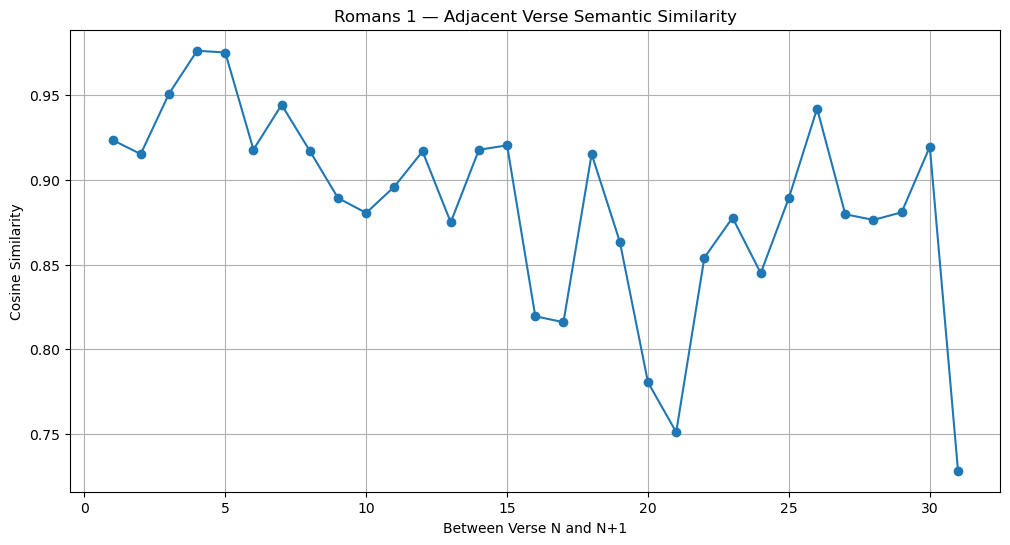

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(adjacent_sims)+1), adjacent_sims, marker='o')
plt.title("Romans 1 — Adjacent Verse Semantic Similarity")
plt.xlabel("Between Verse N and N+1")
plt.ylabel("Cosine Similarity")
plt.grid(True)
plt.show()

In [47]:
rom1_emb.shape

(32, 384)

In [48]:
adjacent_sims

array([0.92356855, 0.91526425, 0.95082235, 0.9763261 , 0.9752661 ,
       0.9178698 , 0.94436145, 0.9171143 , 0.8892839 , 0.8804817 ,
       0.8960215 , 0.9168591 , 0.8748919 , 0.91779363, 0.9204054 ,
       0.8194157 , 0.81591535, 0.91527057, 0.86346674, 0.780337  ,
       0.75094736, 0.85405046, 0.87762845, 0.8449062 , 0.8894314 ,
       0.94213104, 0.8796841 , 0.87633914, 0.88085246, 0.9195999 ,
       0.7281401 ], dtype=float32)

In [91]:
import numpy as np

def find_boundaries(adjacent_sims, major_threshold=0.055, minor_threshold=0.028):
    """
    Identify discourse boundaries based on semantic valley depth.

    Returns:
        dict with keys: "major", "minor", "all"
        where each entry in "all" is a dict:
            {
              "between_verses": (v1, v2),
              "curr_sim": float,
              "depth": float
            }
    """
    adjacent_sims = np.asarray(adjacent_sims, dtype=float)

    # If there aren't enough points to have a local minimum, return empty.
    if adjacent_sims.size < 3:
        return {"major": [], "minor": [], "all": []}

    boundaries = []

    for i in range(1, len(adjacent_sims) - 1):
        prev_sim = adjacent_sims[i - 1]
        curr_sim = adjacent_sims[i]
        next_sim = adjacent_sims[i + 1]

        # local minimum?
        if curr_sim < prev_sim and curr_sim < next_sim:
            depth = min(prev_sim, next_sim) - curr_sim
            boundaries.append({
                "between_verses": (i + 1, i + 2), # boundary after verse (i+1)
                "curr_sim": float(curr_sim),
                "depth": float(depth),
            })

    major = [b for b in boundaries if b["depth"] >= major_threshold]
    minor = [b for b in boundaries if (minor_threshold <= b["depth"] < major_threshold)]

    return {"major": major, "minor": minor, "all": boundaries}


In [51]:
results = find_boundaries(adjacent_sims)
results

Object `minimum` not found.


{'major': [], 'minor': [], 'all': []}

In [92]:
all_bounds = results.get("all", [])

print("n boundaries:", len(all_bounds))

if not all_bounds:
    print("No local-minimum valleys found (so no boundaries).")
else:
    depths = [b["depth"] for b in all_bounds]
    print("min depth:", min(depths), "max depth:", max(depths))
    # show first few
    for b in all_bounds[:10]:
        print("Between", b["between_verses"], "| sim =", b["curr_sim"], "| depth =", b["depth"])

n boundaries: 0
No local-minimum valleys found (so no boundaries).


In [52]:
print(results.keys())

dict_keys(['major', 'minor', 'all'])


In [22]:
import numpy as np

def find_boundaries_auto(adjacent_sims, major_quantile=0.7, minor_quantile=0.4):
    """
    Identify major and minor boundaries using percentiles of valley depth.
    
    major_quantile: e.g. 0.7 → top 30% deepest valleys = major
    minor_quantile: e.g. 0.4 → 40–70% depth range = minor
    """
    adjacent_sims = np.array(adjacent_sims)
    boundaries = []

    # 1. Collect all local minima with depth
    for i in range(1, len(adjacent_sims) - 1):
        prev_sim = adjacent_sims[i - 1]
        curr_sim = adjacent_sims[i]
        next_sim = adjacent_sims[i + 1]

        if curr_sim < prev_sim and curr_sim < next_sim:
            depth = min(prev_sim, next_sim) - curr_sim
            boundaries.append({
                "between_verses": (i + 1, i + 2),
                "curr_sim": float(curr_sim),
                "depth": float(depth),
            })

    if not boundaries:
        return {"major": [], "minor": [], "all": []}

    depths = np.array([b["depth"] for b in boundaries])
    major_thresh = np.quantile(depths, major_quantile)
    minor_thresh = np.quantile(depths, minor_quantile)

    major = [b for b in boundaries if b["depth"] >= major_thresh]
    minor = [b for b in boundaries
             if (b["depth"] >= minor_thresh) and (b["depth"] < major_thresh)]

    return {
        "major": major,
        "minor": minor,
        "all": boundaries,
        "major_thresh": float(major_thresh),
        "minor_thresh": float(minor_thresh),
    }

In [ ]:
cc2_df = gnt_df[gnt_df["book"] == "2Cor"].copy()
cc2_df = cc2_df.sort_values(["chapter", "verse"])
cc2_df.head()

In [ ]:
def get_adjacent_sims_for_chapter(df, chapter):
    """Compute adjacent semantic similarities for a single chapter."""
    ch = df[df["chapter"] == chapter]
    if ch.empty:
        return None, None

    texts = ch["text_gr"].tolist()
    embeddings = sem_model.encode(texts, convert_to_numpy=True)

    adj = []
    for i in range(len(embeddings) - 1):
        sim = cosine_similarity([embeddings[i]], [embeddings[i+1]])[0][0]
        adj.append(sim)

    return ch, np.array(adj)

In [ ]:
chapters = sorted(cc2_df["chapter"].unique())
chapter_results = {}

for ch in chapters:
    ch_df, adj = get_adjacent_sims_for_chapter(cc2_df, ch)
    if adj is None:
        continue

    res = find_boundaries(adj) # fixed threshold version
    auto_res = find_boundaries_auto(adj) # percentile version

    chapter_results[ch] = (res, auto_res)

In [ ]:
# Filter for 2 Corinthians and sort
cc2_df = gnt_df[gnt_df["book"] == "2Cor"].copy()
cc2_df = cc2_df.sort_values(["chapter", "verse"]).reset_index(drop=True)

cc2_df.head()

In [ ]:
# Get all verse texts for 2 Corinthians
cc2_texts = cc2_df["text_gr"].tolist()

# Compute embeddings for all verses in 2 Corinthians
cc2_emb = sem_model.encode(cc2_texts, convert_to_numpy=True)

# Compute adjacent similarities across the WHOLE letter (including chapter boundaries)
cc2_adjacent_sims = []
for i in range(len(cc2_emb) - 1):
    sim = cosine_similarity([cc2_emb[i]], [cc2_emb[i+1]])[0][0]
    cc2_adjacent_sims.append(sim)

cc2_adjacent_sims = np.array(cc2_adjacent_sims)
cc2_adjacent_sims[:10], len(cc2_adjacent_sims)

In [ ]:
cc2_auto_results = find_boundaries_auto(cc2_adjacent_sims)
cc2_auto_results["major_thresh"], cc2_auto_results["minor_thresh"]

In [ ]:
def print_full_book_boundaries(df, auto_results, max_to_show=50):
    """
    Pretty-print major/minor boundaries across a whole book/letter,
    showing actual chapter:verse pairs.
    """
    # Ensure sorted + indexed
    df = df.sort_values(["chapter", "verse"]).reset_index(drop=True)

    def idx_to_ref(idx):
        row = df.iloc[idx]
        return int(row["chapter"]), int(row["verse"])

    print("\n=== MAJOR BOUNDARIES (whole letter) ===")
    majors = auto_results.get("major", [])
    if not majors:
        print("None")
    else:
        for b in majors[:max_to_show]:
            v1_idx = b["between_verses"][0] - 1 # convert back to 0-based index
            v2_idx = v1_idx + 1
            ch1, vs1 = idx_to_ref(v1_idx)
            ch2, vs2 = idx_to_ref(v2_idx)
            print(
                f"Between {ch1}:{vs1} → {ch2}:{vs2} "
                f"| depth={b['depth']:.3f} "
                f"| sim={b['curr_sim']:.3f}"
            )

    print("\n=== MINOR BOUNDARIES (whole letter) ===")
    minors = auto_results.get("minor", [])
    if not minors:
        print("None")
    else:
        for b in minors[:max_to_show]:
            v1_idx = b["between_verses"][0] - 1
            v2_idx = v1_idx + 1
            ch1, vs1 = idx_to_ref(v1_idx)
            ch2, vs2 = idx_to_ref(v2_idx)
            print(
                f"Between {ch1}:{vs1} → {ch2}:{vs2} "
                f"| depth={b['depth']:.3f} "
                f"| sim={b['curr_sim']:.3f}"
            )

In [58]:
import pandas as pd
df_names = [name for name, obj in 
globals().items() if isinstance(obj,
pd.DataFrame)]
df_names

['_7',
 'gnt_df',
 '_9',
 '_16',
 'neighbors',
 '_26',
 '_28',
 '_33',
 '_35',
 'lex_neighbors',
 'sem_neighbors',
 'rom1_df',
 '_41',
 '_42']

In [59]:
[(name, globals()[name].shape) for name in
 df_names]

[('_7', (5, 5)),
 ('gnt_df', (7939, 5)),
 ('_9', (20, 5)),
 ('_16', (10, 6)),
 ('neighbors', (10, 6)),
 ('_26', (5, 5)),
 ('_28', (20, 5)),
 ('_33', (5, 5)),
 ('_35', (10, 6)),
 ('lex_neighbors', (10, 6)),
 ('sem_neighbors', (10, 6)),
 ('rom1_df', (32, 5)),
 ('_41', (5, 5)),
 ('_42', (5, 5))]

In [60]:
MASTER = gnt_df

rom_df = MASTER[MASTER["book"].isin(["Rom", "Romans"])].copy()
rom_df = rom_df.sort_values(["chapter", "verse"]).reset_index(drop=True)

rom_df.shape, rom_df.head()

((430, 5),
   book  chapter  verse      ref  \
 0  Rom        1      1  Rom 1:1   
 1  Rom        1      2  Rom 1:2   
 2  Rom        1      3  Rom 1:3   
 3  Rom        1      4  Rom 1:4   
 4  Rom        1      5  Rom 1:5   
 
                                              text_gr  
 0  Παῦλος δοῦλος ⸂Χριστοῦ Ἰησοῦ⸃, κλητὸς ἀπόστολο...  
 1  ὃ προεπηγγείλατο διὰ τῶν προφητῶν αὐτοῦ ἐν γρα...  
 2  περὶ τοῦ υἱοῦ αὐτοῦ, τοῦ γενομένου ἐκ σπέρματο...  
 3  τοῦ ὁρισθέντος υἱοῦ θεοῦ ἐν δυνάμει κατὰ πνεῦμ...  
 4  διʼ οὗ ἐλάβομεν χάριν καὶ ἀποστολὴν εἰς ὑπακοὴ...  )

In [61]:
[name for name in globals() if "model" in name.lower() or "sem" in name.lower() or "embed" in name.lower()]

['SEM_MODEL_NAME',
 'sem_model',
 'sem_embeddings',
 'get_semantic_neighbors',
 'sem_neighbors']

In [62]:
type(sem_model)

sentence_transformers.SentenceTransformer.SentenceTransformer

In [63]:
rom_texts = rom_df["text_gr"].tolist()

rom_emb = sem_model.encode(
    rom_texts, 
    convert_to_numpy=True, 
    show_progress_bar=True
)

rom_emb.shape


Batches:   0%|          | 0/14 [00:00<?, ?it/s]

(430, 384)

In [64]:
rom_df.shape

(430, 5)

In [65]:
rom_df = gnt_df[gnt_df["book"] == "Rom"].copy()
rom_df = rom_df.sort_values(["chapter", "verse"]).reset_index(drop=True)
rom_df.shape

(430, 5)

In [66]:
gnt_df[gnt_df["book"] == "Rom"].shape

(430, 5)

In [67]:
ROMANS_VERSE_COUNTS = {
    1: 32, 2: 29, 3: 31, 4: 25,
    5: 21, 6: 23, 7: 25, 8: 39,
    9: 33, 10: 21, 11: 36, 12: 21,
    13: 14, 14: 23, 15: 33, 16: 27
}

rom = gnt_df[gnt_df["book"] == "Rom"].copy()
rom["chapter"] = rom["chapter"].astype(int)
rom["verse"] = rom["verse"].astype(int)

present = set(zip(rom["chapter"], rom["verse"]))

expected = set()
for ch, vmax in ROMANS_VERSE_COUNTS.items():
    for v in range(1, vmax + 1):
        expected.add((ch, v))

missing = sorted(expected - present)
missing, len(missing)

([(16, 25), (16, 26), (16, 27)], 3)

In [68]:
# Confirm exact book labels for Timothy
sorted([b for b in gnt_df["book"].unique() if "Tim" in b])

['1Tim', '2Tim']

In [69]:
BOOK_1TIM = "1Tim"
BOOK_2TIM = "2Tim"

tim_df = gnt_df[gnt_df["book"].isin([BOOK_1TIM, BOOK_2TIM])].copy()
tim_df = tim_df.sort_values(["book", "chapter", "verse"]) # NOTE: no reset_index()

print("Timothy rows:", tim_df.shape)
print("1Tim last:", tim_df[tim_df["book"]==BOOK_1TIM].iloc[-1]["ref"])
print("2Tim last:", tim_df[tim_df["book"]==BOOK_2TIM].iloc[-1]["ref"])

Timothy rows: (196, 5)
1Tim last: 1Tim 6:21
2Tim last: 2Tim 4:22


In [70]:
tim_global_idx = tim_df.index.to_numpy() # indices into gnt_df / tfidf_matrix

In [71]:
def tim_lex_neighbors(tim_row_i, topn=10):
    gidx = int(tim_global_idx[tim_row_i])
    # If your function name/argument differs, change it here:
    return get_lexical_neighbors(gidx, top_n=topn)

In [72]:
tim_df.shape

(196, 5)

In [73]:
len(tim_global_idx), tim_global_idx[:5]

(196, array([736, 737, 738, 739, 740]))

In [74]:
tim_lex_neighbors(0, topn=10)

,book,chapter,verse,ref,text_gr,lex_cos_sim
1226,2Tim,1,1,2Tim 1:1,Παῦλος ἀπόστολος ⸂Χριστοῦ Ἰησοῦ⸃ διὰ θελήματος...,0.521927
1118,2Pet,1,1,2Pet 1:1,⸀Συμεὼν Πέτρος δοῦλος καὶ ἀπόστολος Ἰησοῦ Χρισ...,0.487610
2326,Col,1,1,Col 1:1,Παῦλος ἀπόστολος ⸂Χριστοῦ Ἰησοῦ⸃ διὰ θελήματος...,0.429402
7893,Titus,1,1,Titus 1:1,"Παῦλος δοῦλος θεοῦ, ἀπόστολος δὲ Ἰησοῦ Χριστοῦ...",0.417608
7929,Titus,3,6,Titus 3:6,οὗ ἐξέχεεν ἐφʼ ἡμᾶς πλουσίως διὰ Ἰησοῦ Χριστοῦ...,0.385168
7463,Rom,1,1,Rom 1:1,"Παῦλος δοῦλος ⸂Χριστοῦ Ἰησοῦ⸃, κλητὸς ἀπόστολο...",0.375042
0,1Cor,1,1,1Cor 1:1,Παῦλος κλητὸς ἀπόστολος ⸂Χριστοῦ Ἰησοῦ⸃ διὰ θε...,0.367437
735,1Thess,5,28,1Thess 5:28,ἡ χάρις τοῦ κυρίου ἡμῶν Ἰησοῦ Χριστοῦ μεθʼ ⸀ὑμῶν.,0.367304
2421,Eph,1,1,Eph 1:1,Παῦλος ἀπόστολος ⸂Χριστοῦ Ἰησοῦ⸃ διὰ θελήματος...,0.366009
649,1Thess,1,3,1Thess 1:3,μνημονεύοντες ὑμῶν τοῦ ἔργου τῆς πίστεως καὶ τ...,0.363778


In [75]:
#What is the target verse for tim_lex_neighbors(0, ...)?
gidx= int(tim_global_idx[0])
gnt_df.loc[gidx, ["ref", "text_gr"]]

ref                                                 1Tim 1:1
text_gr    Παῦλος ἀπόστολος ⸂Χριστοῦ Ἰησοῦ⸃ κατʼ ἐπιταγὴν...
Name: 736, dtype: object

In [76]:
def tim_row_from_ch_verse(chapter: int, verse: int, book: str = None):
    df = tim_df2
    if book is not None:
        df = df[df["book"] == book]

    match = df[
        (df["chapter"] == chapter) &
        (df["verse"] == verse)
    ]

    if len(match) != 1:
        raise ValueError("Verse not found or not unique")

    return int(match.index[0]) # ✅ ROW POSITION (0..195)

In [77]:
tim_df2 = tim_df.reset_index().rename(columns={"index": "gnt_idx"})
tim_df2.shape, tim_df2.head(2)[["gnt_idx","ref"]]

((196, 6),
    gnt_idx       ref
 0      736  1Tim 1:1
 1      737  1Tim 1:2)

In [78]:
from sentence_transformers import SentenceTransformer

# Use the same model name you used elsewhere in the notebook
sem_model = SentenceTransformer(SEM_MODEL_NAME)

tim_sem_emb = sem_model.encode(
    tim_df2["text_gr"].astype(str).tolist(),
    show_progress_bar=True,
    batch_size=32,
    normalize_embeddings=True
)

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

In [79]:
import numpy as np

def tim_sem_neighbors(tim_row_i, topn=10):
    """
    tim_row_i is a ROW POSITION in tim_df2 (0..195).
    """
    target = tim_sem_emb[tim_row_i]
    sims = tim_sem_emb @ target
    order = np.argsort(sims)[::-1]
    order = order[order != tim_row_i][:topn]

    out = tim_df2.iloc[order][["ref", "text_gr"]].copy()
    out["sem_cos_sim"] = sims[order]
    return out.reset_index(drop=True)

In [80]:
tim_sem_neighbors(0, topn= 10)

,ref,text_gr,sem_cos_sim
0,2Tim 1:1,Παῦλος ἀπόστολος ⸂Χριστοῦ Ἰησοῦ⸃ διὰ θελήματος...,0.981103
1,1Tim 2:3,⸀τοῦτο καλὸν καὶ ἀπόδεκτον ἐνώπιον τοῦ σωτῆρος...,0.964050
2,1Tim 6:14,τηρῆσαί σε τὴν ἐντολὴν ἄσπιλον ἀνεπίλημπτον μέ...,0.951412
3,1Tim 4:3,"κωλυόντων γαμεῖν, ἀπέχεσθαι βρωμάτων ἃ ὁ θεὸς ...",0.947782
4,1Tim 5:17,Οἱ καλῶς προεστῶτες πρεσβύτεροι διπλῆς τιμῆς ἀ...,0.946559
5,1Tim 1:2,"Τιμοθέῳ γνησίῳ τέκνῳ ἐν πίστει· χάρις, ἔλεος, ...",0.943562
6,1Tim 1:5,τὸ δὲ τέλος τῆς παραγγελίας ἐστὶν ἀγάπη ἐκ καθ...,0.941951
7,2Tim 1:11,εἰς ὃ ἐτέθην ἐγὼ κῆρυξ καὶ ἀπόστολος καὶ ⸀διδά...,0.940249
8,2Tim 1:13,ὑποτύπωσιν ἔχε ὑγιαινόντων λόγων ὧν παρʼ ἐμοῦ ...,0.939643
9,2Tim 1:2,"Τιμοθέῳ ἀγαπητῷ τέκνῳ· χάρις, ἔλεος, εἰρήνη ἀπ...",0.939318


In [81]:
def tim_row_from_ref(ref: str) -> int:
    m = tim_df2.index[tim_df2["ref"] == ref].tolist()
    if not m:
        raise ValueError(f"Not found: {ref}")
    return int(m[0])

def tim_sem_neighbors_by_ref(ref: str, topn=10):
    return tim_sem_neighbors(tim_row_from_ref(ref), topn=topn)

def tim_lex_neighbors_by_ref(ref: str, topn=10):
    # uses your existing tim_lex_neighbors which takes a Timothy row position
    return tim_lex_neighbors(tim_row_from_ref(ref), topn=topn)

In [82]:
tim_lex_neighbors_by_ref("1Tim 2:12", topn=10)
tim_sem_neighbors_by_ref("1Tim 2:12", topn=10)

,ref,text_gr,sem_cos_sim
0,2Tim 2:12,"εἰ ὑπομένομεν, καὶ συμβασιλεύσομεν· εἰ ⸀ἀρνησό...",0.975760
1,2Tim 3:9,"ἀλλʼ οὐ προκόψουσιν ἐπὶ πλεῖον, ἡ γὰρ ἄνοια αὐ...",0.972465
2,2Tim 4:15,"ὃν καὶ σὺ φυλάσσου, λίαν γὰρ ⸀ἀντέστη τοῖς ἡμε...",0.970552
3,2Tim 1:11,εἰς ὃ ἐτέθην ἐγὼ κῆρυξ καὶ ἀπόστολος καὶ ⸀διδά...,0.966961
4,2Tim 1:17,ἀλλὰ γενόμενος ἐν Ῥώμῃ ⸀σπουδαίως ἐζήτησέν με ...,0.964322
5,1Tim 1:13,⸀τὸ πρότερον ὄντα βλάσφημον καὶ διώκτην καὶ ὑβ...,0.963932
6,1Tim 3:3,"μὴ πάροινον, μὴ ⸀πλήκτην, ἀλλὰ ἐπιεικῆ, ἄμαχον...",0.962785
7,2Tim 3:17,"ἵνα ἄρτιος ᾖ ὁ τοῦ θεοῦ ἄνθρωπος, πρὸς πᾶν ἔργ...",0.962716
8,1Tim 5:7,"καὶ ταῦτα παράγγελλε, ἵνα ἀνεπίλημπτοι ὦσιν·",0.962511
9,1Tim 1:17,"τῷ δὲ βασιλεῖ τῶν αἰώνων, ἀφθάρτῳ, ἀοράτῳ, ⸀μό...",0.962324


In [ ]:
i = tim_row_from_ch_verse(2, 12, book="1Tim")

tim_lex_neighbors(i, topn=10)
tim_sem_neighbors(i, topn=10)

In [83]:
tim_lex_neighbors_by_ref("1Tim 2:12", topn=10)
tim_sem_neighbors_by_ref("1Tim 2:12", topn=10)

,ref,text_gr,sem_cos_sim
0,2Tim 2:12,"εἰ ὑπομένομεν, καὶ συμβασιλεύσομεν· εἰ ⸀ἀρνησό...",0.975760
1,2Tim 3:9,"ἀλλʼ οὐ προκόψουσιν ἐπὶ πλεῖον, ἡ γὰρ ἄνοια αὐ...",0.972465
2,2Tim 4:15,"ὃν καὶ σὺ φυλάσσου, λίαν γὰρ ⸀ἀντέστη τοῖς ἡμε...",0.970552
3,2Tim 1:11,εἰς ὃ ἐτέθην ἐγὼ κῆρυξ καὶ ἀπόστολος καὶ ⸀διδά...,0.966961
4,2Tim 1:17,ἀλλὰ γενόμενος ἐν Ῥώμῃ ⸀σπουδαίως ἐζήτησέν με ...,0.964322
5,1Tim 1:13,⸀τὸ πρότερον ὄντα βλάσφημον καὶ διώκτην καὶ ὑβ...,0.963932
6,1Tim 3:3,"μὴ πάροινον, μὴ ⸀πλήκτην, ἀλλὰ ἐπιεικῆ, ἄμαχον...",0.962785
7,2Tim 3:17,"ἵνα ἄρτιος ᾖ ὁ τοῦ θεοῦ ἄνθρωπος, πρὸς πᾶν ἔργ...",0.962716
8,1Tim 5:7,"καὶ ταῦτα παράγγελλε, ἵνα ἀνεπίλημπτοι ὦσιν·",0.962511
9,1Tim 1:17,"τῷ δὲ βασιλεῖ τῶν αἰώνων, ἀφθάρτῳ, ἀοράτῳ, ⸀μό...",0.962324


In [ ]:
from IPython.display import display

lex = tim_lex_neighbors_by_ref("1Tim 2:12", topn=10)
sem = tim_sem_neighbors_by_ref("1Tim 2:12", topn=10)

display(lex)
display(sem)

In [84]:
lex=tim_lex_neighbors_by_ref("1Tim 2:12", 
topn=10)
print(lex.columns)
display(lex.head())

Index(['book', 'chapter', 'verse', 'ref', 'text_gr', 'lex_cos_sim'], dtype='object')


,book,chapter,verse,ref,text_gr,lex_cos_sim
766,1Tim,2,11,1Tim 2:11,γυνὴ ἐν ἡσυχίᾳ μανθανέτω ἐν πάσῃ ὑποταγῇ·,0.216738
244,1Cor,11,8,1Cor 11:8,"οὐ γάρ ἐστιν ἀνὴρ ἐκ γυναικός, ἀλλὰ γυνὴ ἐξ ἀν...",0.161283
248,1Cor,11,12,1Cor 11:12,"ὥσπερ γὰρ ἡ γυνὴ ἐκ τοῦ ἀνδρός, οὕτως καὶ ὁ ἀν...",0.147214
659,1Thess,2,3,1Thess 2:3,ἡ γὰρ παράκλησις ἡμῶν οὐκ ἐκ πλάνης οὐδὲ ἐξ ἀκ...,0.142190
916,2Cor,4,9,2Cor 4:9,"διωκόμενοι ἀλλʼ οὐκ ἐγκαταλειπόμενοι, καταβαλλ...",0.134093


In [ ]:
ref = "1Tim 2:12"

lex = tim_lex_neighbors_by_ref(ref, topn=10)
sem = tim_sem_neighbors_by_ref(ref, topn=10)

from IPython.display import display
display(lex)
display(sem)

In [85]:
import inspect
print(inspect.getsource(tim_sem_neighbors))

def tim_sem_neighbors(tim_row_i, topn=10):
    """
    tim_row_i is a ROW POSITION in tim_df2 (0..195).
    """
    target = tim_sem_emb[tim_row_i]
    sims = tim_sem_emb @ target
    order = np.argsort(sims)[::-1]
    order = order[order != tim_row_i][:topn]

    out = tim_df2.iloc[order][["ref", "text_gr"]].copy()
    out["sem_cos_sim"] = sims[order]
    return out.reset_index(drop=True)



In [86]:
sem = tim_sem_neighbors_by_ref("1Tim 2:12", topn=5)
print(sem.columns)

Index(['ref', 'text_gr', 'sem_cos_sim'], dtype='object')


In [93]:
results=find_boundaries(adjacent_sims)
print(results.keys())
print(type(results["all"][0]))

dict_keys(['major', 'minor', 'all'])
<class 'dict'>


In [94]:
print(type(results))
print(results.keys())
print(type(results["all"]))
print(type(results["all"][0]))

<class 'dict'>
dict_keys(['major', 'minor', 'all'])
<class 'list'>
<class 'dict'>


## Phase 1: Vice-list Environment Analysis

With corpus preparation complete, the next step is to analyze the immediate
vice-list contexts in which ἀρσενοκοῖται appears in the New Testament.

This phase proceeds by:
- isolating the two NT occurrences (1 Cor 6:9; 1 Tim 1:10),
- extracting the full vice lists in each passage,
- and characterizing the grammatical and moral categories of co-occurring terms.

No lexical definitions or etymological inferences are introduced at this stage.
The purpose of this phase is methodological calibration prior to semantic modeling.

In [97]:
import pandas as pd
import re
import unicodedata

TARGETS = [
    {"book": "1Cor", "chapter": 6, "verse": 9, "label": "1Cor 6:9"},
    {"book": "1Tim", "chapter": 1, "verse": 10, "label": "1Tim 1:10"},
]

def normalize_greek(s: str) -> str:
    return unicodedata.normalize("NFC", s)

def clean_text(s: str) -> str:
    s = normalize_greek(s)
    s = re.sub(r"[··.,;:!?\"'“”‘’()\[\]{}<>]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

def get_verse(df: pd.DataFrame, book: str, chapter: int, verse: int) -> dict:
    row = df.loc[
        (df["book"] == book) &
        (df["chapter"].astype(str) == str(chapter)) &
        (df["verse"].astype(str) == str(verse))
    ]
    if row.empty:
        return None
    r = row.iloc[0]
    return {"ref": r["ref"], "text_gr": r["text_gr"]}

passages = []
for t in TARGETS:
    result = get_verse(gnt_df, t["book"], t["chapter"], t["verse"])
    if result is None:
        raise ValueError(f"Verse not found: {t['label']} (book='{t['book']}')")
    passages.append({
        "label": t["label"],
        "ref": result["ref"],
        "raw_text": result["text_gr"],
        "clean_text": clean_text(result["text_gr"]),
    })

passages_df = pd.DataFrame(passages)
display(passages_df[["label", "ref", "raw_text"]])

,label,ref,raw_text
0,1Cor 6:9,1Cor 6:9,Ἢ οὐκ οἴδατε ὅτι ἄδικοι ⸂θεοῦ βασιλείαν⸃ οὐ κλ...
1,1Tim 1:10,1Tim 1:10,"πόρνοις, ἀρσενοκοίταις, ἀνδραποδισταῖς, ψεύστα..."


In [98]:
import re
import unicodedata
import pandas as pd

def strip_diacritics(s: str) -> str:
    # For matching only (we keep original tokens separately)
    s = unicodedata.normalize("NFD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    return unicodedata.normalize("NFC", s)

def tokenize_greek(s: str) -> list[str]:
    # Keep Greek letters; split on whitespace/punctuation
    s = unicodedata.normalize("NFC", s)
    s = re.sub(r"[··.,;:!?\"'“”‘’()\[\]{}<>]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s.split()

def find_token_index(tokens: list[str], target_substring: str) -> int | None:
    # target_substring should be diacritic-stripped
    for i, tok in enumerate(tokens):
        if target_substring in strip_diacritics(tok).lower():
            return i
    return None

TARGET = "αρσενοκοιτ" # diacritic-stripped stem for matching various inflections

rows = []
for _, r in passages_df.iterrows():
    tokens = tokenize_greek(r["raw_text"])
    idx = find_token_index(tokens, TARGET)

    if idx is None:
        raise ValueError(f"Target not found in {r['label']}. Try inspecting tokens.")

    # immediate neighbors
    prev_tok = tokens[idx - 1] if idx - 1 >= 0 else None
    next_tok = tokens[idx + 1] if idx + 1 < len(tokens) else None

    # window of +/- 6 tokens for quick “company it keeps” view
    w = 6
    window = tokens[max(0, idx - w): min(len(tokens), idx + w + 1)]

    rows.append({
        "label": r["label"],
        "target_token": tokens[idx],
        "prev_token": prev_tok,
        "next_token": next_tok,
        "token_count": len(tokens),
        "window_±6": " ".join(window),
        "all_tokens": tokens, # keeps list for later steps
    })

neighbors_df = pd.DataFrame(rows)
display(neighbors_df[["label", "target_token", "prev_token", "next_token", "window_±6"]])

,label,target_token,prev_token,next_token,window_±6
0,1Cor 6:9,ἀρσενοκοῖται,οὔτε,None,εἰδωλολάτραι οὔτε μοιχοὶ οὔτε μαλακοὶ οὔτε ἀρσ...
1,1Tim 1:10,ἀρσενοκοίταις,πόρνοις,ἀνδραποδισταῖς,πόρνοις ἀρσενοκοίταις ἀνδραποδισταῖς ψεύσταις ...


### Note on Verse Boundaries

In some editions, Pauline vice lists are segmented across verse boundaries. Considering that there is no "next token" after ἀρσενοκοῖται in 1Cor 6:9, this may be the case. To avoid truncating a list mid-sequence, adjacent verses are temporarily
concatenated (1 Cor 6:9–10; 1 Tim 1:9–10) for the purpose of extracting
complete vice-list environments. For Phase 1 the following units are analyzed: 1 Corinthians 6:9-10 and 1 Timothy 1:9-10

In [99]:
import pandas as pd

def get_text_gr(df, book, chapter, verse):
    row = df.loc[
        (df["book"] == book) &
        (df["chapter"].astype(str) == str(chapter)) &
        (df["verse"].astype(str) == str(verse))
    ]
    if row.empty:
        raise ValueError(f"Missing verse: {book} {chapter}:{verse}")
    return row.iloc[0]["text_gr"]

# Units that include the “next verse” so the vice list isn't cut off
ANALYSIS_UNITS = [
    {"label": "1Cor 6:9–10", "book": "1Cor", "verses": [(6, 9), (6, 10)]},
    {"label": "1Tim 1:9–10", "book": "1Tim", "verses": [(1, 9), (1, 10)]},
]

units = []
for u in ANALYSIS_UNITS:
    combined_text = " ".join(
        get_text_gr(gnt_df, u["book"], ch, vs)
        for ch, vs in u["verses"]
    )
    units.append({
        "label": u["label"],
        "book": u["book"],
        "verses": u["verses"],
        "combined_text": combined_text
    })

units_df = pd.DataFrame(units)
display(units_df[["label", "verses", "combined_text"]])

,label,verses,combined_text
0,1Cor 6:9–10,"[(6, 9), (6, 10)]",Ἢ οὐκ οἴδατε ὅτι ἄδικοι ⸂θεοῦ βασιλείαν⸃ οὐ κλ...
1,1Tim 1:9–10,"[(1, 9), (1, 10)]","εἰδὼς τοῦτο, ὅτι δικαίῳ νόμος οὐ κεῖται, ἀνόμο..."


### Tokenization of Vice-List Units

As a preparatory analytic step, the concatenated verse units
(1 Cor 6:9–10 and 1 Tim 1:9–10) are tokenized into individual word forms.

Tokenization serves two purposes at this stage:
1. to make the structure of the vice lists visible and inspectable, and
2. to allow precise identification of co-occurring terms and list markers
   without introducing semantic interpretation.

At this stage, tokens are not lemmatized, translated, or categorized.
This step is purely mechanical and is intended to establish a transparent
basis for subsequent extraction and tagging of vice-list items.

In [100]:
import re
import unicodedata

def tokenize_greek(s: str) -> list[str]:
    s = unicodedata.normalize("NFC", s)
    s = re.sub(r"[··.,;:!?\"'“”‘’()\[\]{}<>]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s.split()

tokenized = []
for _, r in units_df.iterrows():
    tokens = tokenize_greek(r["combined_text"])
    tokenized.append({
        "label": r["label"],
        "tokens": tokens,
        "token_count": len(tokens)
    })

tokens_df = pd.DataFrame(tokenized)
display(tokens_df[["label", "token_count", "tokens"]])

,label,token_count,tokens
0,1Cor 6:9–10,34,"[Ἢ, οὐκ, οἴδατε, ὅτι, ἄδικοι, ⸂θεοῦ, βασιλείαν..."
1,1Tim 1:9–10,34,"[εἰδὼς, τοῦτο, ὅτι, δικαίῳ, νόμος, οὐ, κεῖται,..."


### Extraction of Vice-List Items

Although both passages contain vice lists, their internal structure differs
syntactically. Accordingly, vice-list items are extracted using passage-specific
formal cues rather than a single uniform rule.

In 1 Corinthians 6:9–10, the vice list is explicitly structured by repeated
negative particles (οὔτε / μήτε). In this case, vice-list items are operationally
defined as the tokens immediately following each such particle.

In 1 Timothy 1:9–10, the vice list appears as a contiguous sequence of plural
dative nouns without repeated list particles. Here, vice-list items are extracted
as a continuous run of tokens anchored at πόρνοις and inspected as a group,
with boundaries refined in a subsequent step.

These extraction rules are based solely on observable grammatical and structural
features of the text. No lexical definitions or semantic classifications are
introduced at this stage.


In [103]:
import unicodedata
import pandas as pd

def strip_diacritics(s: str) -> str:
    s = unicodedata.normalize("NFD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    return unicodedata.normalize("NFC", s)

def extract_after_markers(tokens, markers=("ουτε", "μητε")):
    items = []
    for i, tok in enumerate(tokens[:-1]):
        t = strip_diacritics(tok).lower()
        if t in markers:
            items.append(tokens[i+1])
    return items

def find_index_contains(tokens, needle):
    needle = needle.lower()
    for i, tok in enumerate(tokens):
        if needle in strip_diacritics(tok).lower():
            return i
    return None

# Build a lookup from your tokens_df (from the previous step)
tokens_lookup = {row["label"]: row["tokens"] for _, row in tokens_df.iterrows()}

# --- 1) Corinthians: items after οὔτε/μήτε ---
cor_tokens = tokens_lookup["1Cor 6:9–10"]
cor_items = extract_after_markers(cor_tokens)

# --- 2) Timothy: take the list run anchored at πόρνοις (inspectable first pass) ---
tim_tokens = tokens_lookup["1Tim 1:9–10"]
start = find_index_contains(tim_tokens, "πορνοις")
if start is None:
    raise ValueError("Could not find πόρνοις in 1Tim 1:9–10 tokens.")

# First-pass slice (we inspect and then tighten the stop rule)
tim_items = tim_tokens[start:start+20]


# --- Present results cleanly ---
out = pd.DataFrame([
    {"label": "1Cor 6:9–10", "extraction_rule": "token after οὔτε/μήτε", "items": cor_items},
    {"label": "1Tim 1:9–10", "extraction_rule": "slice from πόρνοις (first-pass)", "items": tim_items},
])

display(out)

,label,extraction_rule,items
0,1Cor 6:9–10,token after οὔτε/μήτε,"[πόρνοι, εἰδωλολάτραι, μοιχοὶ, μαλακοὶ, ἀρσενο..."
1,1Tim 1:9–10,slice from πόρνοις (first-pass),"[πόρνοις, ἀρσενοκοίταις, ἀνδραποδισταῖς, ψεύστ..."


In [106]:
def find_neighbors(items, target_substring):
    stripped = [strip_diacritics(tok).lower() for tok in items]
    for i, tok in enumerate(stripped):
        if target_substring in tok:
            return {
                "target": items[i],
                "previous": items[i-1] if i > 0 else None,
                "next": items[i+1] if i+1 < len(items) else None,
                "index": i
            }
    return None
#Note: Index refers to the 0-based position of the token within the extracted 
#vice-list array and is included for structural reference only.

neighbors_df = pd.DataFrame([
    {
        "label": "1Cor 6:9–10",
        **find_neighbors(cor_items, "αρσενοκοιτ")
    },
    {
        "label": "1Tim 1:9–10",
        **find_neighbors(tim_items, "αρσενοκοιτ")
    }
])

display(neighbors_df)

,label,target,previous,next,index
0,1Cor 6:9–10,ἀρσενοκοῖται,μαλακοὶ,⸂κλέπται,4
1,1Tim 1:9–10,ἀρσενοκοίταις,πόρνοις,ἀνδραποδισταῖς,1


### Phase 1 Calibration Note (ἀρσενοκοῖται)

The lexeme ἀρσενοκοῖται occurs twice in the New Testament, in 1 Cor 6:9–10 and 1 Tim 1:9–10, both within vice-list contexts. 
To avoid truncation at verse boundaries, each vice list was treated as a concatenated unit (1 Cor 6:9–10; 1 Tim 1:9–10) and tokenized using a punctuation-as-delimiter rule. 
Vice-list items were extracted using observable structural cues: tokens following οὔτε/μήτε in Corinthians, and a contiguous dative sequence anchored at πόρνοις in Timothy. 
Within these extracted lists, ἀρσενοκοῖται is flanked by μαλακοὶ and κλέπται in 1 Corinthians, and by πόρνοις and ἀνδραποδισταῖς in 1 Timothy. 
Although the list structures differ (particle-marked vs contiguous datives), the term’s grammatical role and placement within vice lists is stable across both contexts. 
This confirms that the method is recovering coherent local environments suitable for extending to computational neighborhood analysis and broader corpora.

In [107]:
import pandas as pd
import unicodedata

def strip_diacritics(s: str) -> str:
    s = unicodedata.normalize("NFD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    return unicodedata.normalize("NFC", s)

def find_index_contains(tokens, needle):
    needle = needle.lower()
    for i, tok in enumerate(tokens):
        if needle in strip_diacritics(tok).lower():
            return i
    return None

def context_window(tokens, idx, window=10):
    start = max(0, idx - window)
    end = min(len(tokens), idx + window + 1)
    return tokens[start:end], start, end

# Build a lookup from tokens_df you already created earlier
tokens_lookup = {row["label"]: row["tokens"] for _, row in tokens_df.iterrows()}

TARGET = "αρσενοκοιτ"
WINDOW = 10

rows = []
windows = {}

for label in ["1Cor 6:9–10", "1Tim 1:9–10"]:
    toks = tokens_lookup[label]
    idx = find_index_contains(toks, TARGET)
    if idx is None:
        raise ValueError(f"Target not found in {label}")

    win, start, end = context_window(toks, idx, window=WINDOW)
    windows[label] = win

    rows.append({
        "label": label,
        "target_token": toks[idx],
        "target_index": idx,
        "window_size": WINDOW,
        "context_window": " ".join(win)
    })

context_df = pd.DataFrame(rows)
display(context_df)

# Compute simple token overlap (Jaccard) between the two windows
def normalize_token(tok):
    return strip_diacritics(tok).lower()

set_cor = set(normalize_token(t) for t in windows["1Cor 6:9–10"])
set_tim = set(normalize_token(t) for t in windows["1Tim 1:9–10"])

intersection = set_cor & set_tim
union = set_cor | set_tim
jaccard = len(intersection) / len(union) if union else 0.0

print("Overlap (normalized tokens)")
print("Intersection:", sorted(intersection))
print(f"Jaccard similarity: {jaccard:.3f}")

,label,target_token,target_index,window_size,context_window
0,1Cor 6:9–10,ἀρσενοκοῖται,20,10,πλανᾶσθε οὔτε πόρνοι οὔτε εἰδωλολάτραι οὔτε μο...
1,1Tim 1:9–10,ἀρσενοκοίταις,22,10,καὶ ἁμαρτωλοῖς ἀνοσίοις καὶ βεβήλοις πατρολῴαι...


Overlap (normalized tokens)
Intersection: []
Jaccard similarity: 0.000


### Phase 1 Extension: Structured Tagging of Co-occurring Terms

Having isolated the vice-list items and identified the immediate neighbors of ἀρσενοκοῖται
in both passages, the next step is to characterize these co-occurring terms using a small
set of explicit, low-inference labels.

This tagging step is not a lexical definition exercise. Its purpose is to make the comparison
features transparent before introducing any modeling or expanding the corpus. Two categories
are recorded for each co-occurring term:

1. **Grammatical profile** (e.g., noun/agent noun; case/number where relevant)
2. **Broad wrongdoing domain** (coarse categories such as sexual, economic, violent/exploitative,
   legal, religious), used only for descriptive clustering.

In [109]:
import pandas as pd

# Build a minimal set of co-occurring terms to tag:
# immediate neighbors + the target form in each passage.
tag_rows = []
for _, r in neighbors_df.iterrows():
    label = r["label"]
    tag_rows.append({"label": label, "term": r["previous"], "role_in_list": "previous"})
    tag_rows.append({"label": label, "term": r["target"], "role_in_list": "target"})
    tag_rows.append({"label": label, "term": r["next"], "role_in_list": "next"})

tag_df = (
    pd.DataFrame(tag_rows)
    .dropna(subset=["term"])
    .drop_duplicates(subset=["label", "term", "role_in_list"])
    .reset_index(drop=True)
)

# Add empty columns for you to fill in (manual coding is fine at this stage)
tag_df["grammatical_profile"] = ""
tag_df["domain_tag"] = ""
tag_df["notes"] = ""

display(tag_df)

,label,term,role_in_list,grammatical_profile,domain_tag,notes
0,1Cor 6:9–10,μαλακοὶ,previous,,,
1,1Cor 6:9–10,ἀρσενοκοῖται,target,,,
2,1Cor 6:9–10,⸂κλέπται,next,,,
3,1Tim 1:9–10,πόρνοις,previous,,,
4,1Tim 1:9–10,ἀρσενοκοίταις,target,,,
5,1Tim 1:9–10,ἀνδραποδισταῖς,next,,,


In [111]:
# 1 Corinthians 6:9–10 neighbors
tag_df.loc[
    (tag_df["label"] == "1Cor 6:9–10") & (tag_df["term"] == "μαλακοὶ"),
    ["grammatical_profile", "domain_tag", "notes"]
] = [
    "agent noun, plural nominative",
    "sexual",
    "immediate neighbor (preceding)"
]

tag_df.loc[
    (tag_df["label"] == "1Cor 6:9–10") & (tag_df["term"] == "⸂κλέπται"),
    ["grammatical_profile", "domain_tag", "notes"]
] = [
    "agent noun, plural nominative",
    "economic",
    "immediate neighbor (following)"
]

# 1 Timothy 1:9–10 neighbors
tag_df.loc[
    (tag_df["label"] == "1Tim 1:9–10") & (tag_df["term"] == "πόρνοις"),
    ["grammatical_profile", "domain_tag", "notes"]
] = [
    "agent noun, plural dative",
    "sexual",
    "immediate neighbor (preceding)"
]

tag_df.loc[
    (tag_df["label"] == "1Tim 1:9–10") & (tag_df["term"] == "ἀνδραποδισταῖς"),
    ["grammatical_profile", "domain_tag", "notes"]
] = [
    "agent noun, plural dative",
    "violent / exploitative",
    "immediate neighbor (following)"
]

# Target term: grammatical profile filled, domain intentionally left undecided
tag_df.loc[
    (tag_df["label"] == "1Cor 6:9–10") & (tag_df["term"] == "ἀρσενοκοῖται"),
    "grammatical_profile"
] = "agent noun, plural nominative"

tag_df.loc[
    (tag_df["label"] == "1Tim 1:9–10") & (tag_df["term"] == "ἀρσενοκοίταις"),
    "grammatical_profile"
] = "agent noun, plural dative"

tag_df.loc[tag_df["role_in_list"] == "target", "domain_tag"] = "TBD"
tag_df.loc[tag_df["role_in_list"] == "target", "notes"] = "domain intentionally not assigned at Phase 1"

display(tag_df)

,label,term,role_in_list,grammatical_profile,domain_tag,notes
0,1Cor 6:9–10,μαλακοὶ,previous,"agent noun, plural nominative",sexual,immediate neighbor (preceding)
1,1Cor 6:9–10,ἀρσενοκοῖται,target,"agent noun, plural nominative",TBD,domain intentionally not assigned at Phase 1
2,1Cor 6:9–10,⸂κλέπται,next,"agent noun, plural nominative",economic,immediate neighbor (following)
3,1Tim 1:9–10,πόρνοις,previous,"agent noun, plural dative",sexual,immediate neighbor (preceding)
4,1Tim 1:9–10,ἀρσενοκοίταις,target,"agent noun, plural dative",TBD,domain intentionally not assigned at Phase 1
5,1Tim 1:9–10,ἀνδραποδισταῖς,next,"agent noun, plural dative",violent / exploitative,immediate neighbor (following)


### Phase 1 Synthesis: Vice-List Environment of ἀρσενοκοῖται

The lexeme ἀρσενοκοῖται occurs twice in the New Testament, in 1 Cor 6:9–10 and 1 Tim 1:9–10, and in both cases appears within vice-list discourse. To avoid verse-boundary truncation, each vice list was analyzed as a concatenated unit (1 Cor 6:9–10; 1 Tim 1:9–10) and tokenized using a punctuation-as-delimiter rule. Vice-list items were then extracted using formal structural cues (οὔτε/μήτε markers in Corinthians; a contiguous dative sequence in Timothy), and the immediate list-neighbors of ἀρσενοκοῖται were identified within each extracted list.

In 1 Cor 6:9–10, ἀρσενοκοῖται is immediately preceded by μαλακοὶ (tagged here as a sexual-domain term) and followed by κλέπται (economic-domain term). In 1 Tim 1:9–10, ἀρσενοκοίταις is immediately preceded by πόρνοις (sexual-domain term) and followed by ἀνδραποδισταῖς (violent/exploitative-domain term). Across both contexts, the term functions grammatically as a plural agent noun embedded within vice lists, while its immediate neighbors span multiple wrongdoing domains. Consistent with the methodological goal of Phase 1, the domain of the target lexeme itself is intentionally left unassigned at this stage, pending broader neighborhood analysis and comparison with additional corpora.


### Phase 2A: NT-wide Co-occurrence Neighborhoods (Distributional Baseline)

To extend the Phase 1 vice-list analysis without introducing opaque models, we construct
a transparent co-occurrence neighborhood model over the entire Greek New Testament corpus.
Each token is represented by a co-occurrence count vector: counts of which other tokens
appear within a symmetric ±N-token window around it across the corpus.

Similarity between tokens is computed via cosine similarity between their co-occurrence
vectors (count-based distributional similarity). This provides an interpretable baseline
for “semantic neighbors” grounded entirely in observed lexical environments.

Because Greek word order and short multi-word expressions may span more than 5 tokens,
we compute neighborhoods using two window sizes:
- **±6 tokens** (primary)
- **±5 tokens** (robustness check)

If the highest-ranked neighbors are stable across these windows, it increases confidence
that the recovered neighborhood structure is not an artifact of an arbitrary window choice.

In [113]:
import re
import unicodedata
from collections import Counter, defaultdict

def strip_diacritics(s: str) -> str:
    s = unicodedata.normalize("NFD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    return unicodedata.normalize("NFC", s)

def tokenize_greek(s: str) -> list[str]:
    s = unicodedata.normalize("NFC", s)
    s = re.sub(r"[··.,;:!?\"'“”‘’()\[\]{}<>]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s.split()

token_freq = Counter()
surface_freq = defaultdict(Counter)

hits = []

for txt in gnt_df["text_gr"].astype(str).tolist():
    surface_toks = tokenize_greek(txt)
    norm_toks = [strip_diacritics(t).lower() for t in surface_toks]

    for n, s in zip(norm_toks, surface_toks):
        token_freq[n] += 1
        surface_freq[n][s] += 1

        # Search by a *very* robust cue:
        # either the surface token has "ἀρσενο" OR the normalized token has "αρσενο"
        if ("ἀρσενο" in s) or ("αρσενο" in n):
            hits.append((n, s))

# Summarize what we found
if not hits:
    print("No tokens containing αρσενο/ἀρσενο were found in the corpus token stream.")
else:
    # Count distinct normalized forms
    hit_norm_counts = Counter([h[0] for h in hits])
    print("Normalized forms containing αρσενο (with counts):")
    for form, c in hit_norm_counts.most_common(20):
        example_surface = surface_freq[form].most_common(1)[0][0]
        print(f" {form} | freq={c} | example surface={example_surface}")

    # Pick the most frequent as default target_norm
    target_norm = hit_norm_counts.most_common(1)[0][0]
    target_surface = surface_freq[target_norm].most_common(1)[0][0]
    print("\nChosen target_norm for neighborhood model:")
    print(" target_norm =", target_norm)
    print(" target_surface=", target_surface)

Normalized forms containing αρσενο (with counts):
 αρσενοκοιται | freq=1 | example surface=ἀρσενοκοῖται
 αρσενοκοιταις | freq=1 | example surface=ἀρσενοκοίταις

Chosen target_norm for neighborhood model:
 target_norm = αρσενοκοιται
 target_surface= ἀρσενοκοῖται


In [114]:
import math
from collections import Counter, defaultdict
import pandas as pd

# --- Use what we just learned from your diagnostic ---
TARGET_FORMS = ["αρσενοκοιται", "αρσενοκοιταις"] # normalized targets
MIN_COUNT = 1 # MUST be 1 because targets are rare
STOP_TOP_N = 20 # remove ultra-frequent tokens from neighbor list
TOP_K = 25 # neighbors to display
WINDOWS = [5, 6] # robustness check + primary

# If you already have these objects from the diagnostic cell, you can reuse them.
# Otherwise, rebuild token_freq/surface_freq/corpus_tokens quickly here:
token_freq = Counter()
surface_freq = defaultdict(Counter)
corpus_tokens = []

for txt in gnt_df["text_gr"].astype(str).tolist():
    surface_toks = tokenize_greek(txt)
    norm_toks = [strip_diacritics(t).lower() for t in surface_toks]
    corpus_tokens.append((norm_toks, surface_toks))
    token_freq.update(norm_toks)
    for n, s in zip(norm_toks, surface_toks):
        surface_freq[n][s] += 1

stop_tokens = set([t for t, _ in token_freq.most_common(STOP_TOP_N)])
vocab = set([t for t, c in token_freq.items() if c >= MIN_COUNT])

# Sanity check
present_targets = [t for t in TARGET_FORMS if t in vocab]
if not present_targets:
    raise ValueError("Target forms not present in vocab even with MIN_COUNT=1. Check tokenization.")
print("Target forms present:", present_targets)

def build_cooc(window: int):
    cooc = defaultdict(Counter)
    for norm_toks, _surface in corpus_tokens:
        seq = [t for t in norm_toks if t in vocab]
        L = len(seq)
        for i, w in enumerate(seq):
            left = max(0, i - window)
            right = min(L, i + window + 1)
            for j in range(left, right):
                if j == i:
                    continue
                c = seq[j]
                cooc[w][c] += 1
    return cooc

def cosine_sim(vec_a: Counter, vec_b: Counter):
    # dot product
    if not vec_a or not vec_b:
        return 0.0
    dot = 0
    # iterate smaller
    if len(vec_a) > len(vec_b):
        vec_a, vec_b = vec_b, vec_a
    for k, va in vec_a.items():
        vb = vec_b.get(k)
        if vb:
            dot += va * vb
    norm_a = math.sqrt(sum(v*v for v in vec_a.values()))
    norm_b = math.sqrt(sum(v*v for v in vec_b.values()))
    if norm_a == 0 or norm_b == 0:
        return 0.0
    return dot / (norm_a * norm_b)

def neighbors_for_targetvec(cooc, target_vec: Counter, label: str, window: int):
    rows = []
    for w, vec in cooc.items():
        if w in stop_tokens:
            continue
        if w in TARGET_FORMS:
            continue
        sim = cosine_sim(target_vec, vec)
        if sim <= 0:
            continue
        surf

Target forms present: ['αρσενοκοιται', 'αρσενοκοιταις']


Because the lexeme occurs only twice in the New Testament, NT-wide co-occurrence methods
yield extremely sparse distributional vectors. As a result, cosine similarity over raw
co-occurrence counts does not recover stable lexical neighbors beyond the immediate
vice-list contexts identified in Phase 1. This sparsity reflects corpus limitations
rather than model failure and motivates expansion to a larger early Christian Greek corpus.

> **Note on sparsity:** Because the lexeme occurs only twice in the New Testament,
> NT-wide co-occurrence methods yield extremely sparse distributional vectors. As a result,
> cosine similarity over raw co-occurrence counts does not recover stable lexical neighbors
> beyond the immediate vice-list contexts identified in Phase 1. This sparsity reflects
> corpus limitations rather than model failure and motivates expansion to a larger early
> Christian Greek corpus.

## Phase 2B: Expansion to the Apostolic Fathers

The extreme distributional sparsity observed for ἀρσενοκοῖται within the New Testament
reflects corpus size rather than semantic indeterminacy. Because the lexeme occurs only
twice in the NT, NT-wide co-occurrence methods cannot recover stable neighborhood structure
beyond the immediate vice-list environments documented in Phase 1. To test whether those
local environments generalize beyond Paul, the analysis is expanded to a larger early
Christian Greek corpus: the Apostolic Fathers.

This phase applies the *same analytic pipeline* used in Phases 1 and 2A—tokenization,
diacritic normalization, symmetric co-occurrence windows (±5 and ±6), and transparent
distributional similarity—without introducing new modeling assumptions. The goal is not
to retroject later meanings into the New Testament, but to assess whether similar lexical
neighborhoods persist in closely adjacent early Christian texts. Consistency across these
corpora would strengthen the inference that the vice-list environment reflects a stable
moral category rather than a context-specific rhetorical choice.

## Phase 2B: Expansion to the Apostolic Fathers

All scraping, cleaning, and chunk-level annotation for the Apostolic Fathers  
(Didache and 1 Clement) now lives in the companion notebook  
`apostolic_fathers_analysis.ipynb`.

This notebook assumes that the processed chunk tables have already been written to
`../data/processed/` (e.g., `didache_chunks.csv`, `clement_chunks.csv`) and will
only **load and integrate** those tables for cross-corpus similarity analysis.

In [10]:
import os
import pandas as pd

# Optional: just to sanity-check where this notebook thinks it is
print("CWD:", os.getcwd())

# Adjust the paths if your biblical notebook lives somewhere else
df_didache = pd.read_csv("../data/processed/didache_chunks.csv")
df_clement = pd.read_csv("../data/processed/clement_chunks.csv")

print("Didache:", df_didache.shape)
print("Clement:", df_clement.shape)

df_didache.head(3)

CWD: C:\Users\rache\Documents\Biblical Semantic Project
Didache: (100, 10)
Clement: (400, 9)


,work,ref,chunk_id,norm_text,tokens,imperative_count,has_imperative,imperative_rate_1000,imperatives_per_100_tokens,imperative_tokens
0,Didache,1.1,Did_1.1,"Ὁδοὶ δύο εἰσί, μία τῆς ζωῆς καὶ μια τοῦ θανάτο...",17,0,False,0.000000,0.000000,NaN
1,Didache,1.2,Did_1.2,Ἡ μὲν οὖν ὁδὸς τῆς ζωῆς ἐστιν αὕτη: πρῶτον ἀγα...,34,1,True,29.411765,2.941176,ποίει
2,Didache,1.3,Did_1.3,Τούτων δὲ τῶν λόγων ἡ διδαχή ἐστιν αὕτη: . 46....,49,5,True,102.040816,10.204082,46. εὐλογεῖτε προσεύχεσθε νηστεύετε ἀγαπᾶτε


In [11]:
df_didache["corpus"] = "Didache"
df_clement["corpus"] = "1Clem"

In [12]:
af_refs = pd.concat([df_didache, df_clement], ignore_index=True)

In [13]:
import pandas as pd

def merge_into_token_chunks(df, min_tokens=40, max_tokens=80):
    """
    Merge small ref-level rows into larger chunks of roughly [min_tokens, max_tokens]
    tokens, preserving order within each work and summing imperative metadata.
    """
    df = df.copy()

    # Make sure key columns are in the right types
    df["ref"] = df["ref"].astype(str)
    df["norm_text"] = df["norm_text"].fillna("").astype(str)
    df["tokens"] = df["tokens"].fillna(0).astype(int)

    # Robust parsing: '16.2', '16', 'preface', etc.
    def parse_ref(ref):
        s = str(ref)
        if "." in s:
            left, right = s.split(".", 1)
            try:
                return int(left), int(right)
            except ValueError:
                pass
        try:
            return int(s), 0 # '16' -> (16, 0)
        except ValueError:
            return 0, 0 # 'preface' -> (0, 0)

    parsed = df["ref"].apply(parse_ref)
    df["chapter_num"] = [p[0] for p in parsed]
    df["sub_num"] = [p[1] for p in parsed]

    df = df.sort_values(["work", "chapter_num", "sub_num"]).reset_index(drop=True)

    chunks = []

    for work, group in df.groupby("work", sort=False):
        group = group.reset_index(drop=True)

        current_refs = []
        current_texts = []
        current_tokens = 0
        current_imp_count = 0
        current_imp_tokens = []

        for _, row in group.iterrows():
            row_tokens = int(row["tokens"])

            # If we already have enough tokens and adding this would push us over max,
            # close current chunk.
            if current_refs and current_tokens >= min_tokens and current_tokens + row_tokens > max_tokens:
                total_tokens = current_tokens if current_tokens > 0 else 1
                chunks.append({
                    "work": work,
                    "refs": ";".join(current_refs),
                    "chunk_id": f"{work}_{current_refs[0]}-{current_refs[-1]}",
                    "norm_text": " ".join(current_texts),
                    "tokens": current_tokens,
                    "imperative_count": current_imp_count,
                    "has_imperative": current_imp_count > 0,
                    "imperatives_per_100_tokens": 100.0 * current_imp_count / total_tokens,
                    "imperative_tokens": " ".join(current_imp_tokens),
                })

                # reset accumulators
                current_refs = []
                current_texts = []
                current_tokens = 0
                current_imp_count = 0
                current_imp_tokens = []

            # Add this row
            current_refs.append(row["ref"]) # already str
            current_texts.append(row["norm_text"]) # already str
            current_tokens += row_tokens
            current_imp_count += int(row.get("imperative_count", 0) or 0)

            imp_tok_str = row.get("imperative_tokens", "")
            if isinstance(imp_tok_str, str) and imp_tok_str.strip():
                current_imp_tokens.extend(imp_tok_str.split())

        # Flush last chunk for this work
        if current_refs:
            total_tokens = current_tokens if current_tokens > 0 else 1
            chunks.append({
                "work": work,
                "refs": ";".join(current_refs),
                "chunk_id": f"{work}_{current_refs[0]}-{current_refs[-1]}",
                "norm_text": " ".join(current_texts),
                "tokens": current_tokens,
                "imperative_count": current_imp_count,
                "has_imperative": current_imp_count > 0,
                "imperatives_per_100_tokens": 100.0 * current_imp_count / total_tokens,
                "imperative_tokens": " ".join(current_imp_tokens),
            })

    return pd.DataFrame(chunks)

In [14]:
did_chunks = merge_into_token_chunks(df_didache, min_tokens=40, max_tokens=80)
clem_chunks = merge_into_token_chunks(df_clement, min_tokens=40, max_tokens=80)

print("Didache chunks:", did_chunks.shape)
print("Clement chunks:", clem_chunks.shape)

print("\nDidache token summary:")
print(did_chunks["tokens"].describe())

print("\nClement token summary:")
print(clem_chunks["tokens"].describe())

Didache chunks: (32, 9)
Clement chunks: (122, 9)

Didache token summary:
count     32.000000
mean      68.687500
std       11.551951
min       48.000000
25%       61.500000
50%       71.000000
75%       75.000000
max      104.000000
Name: tokens, dtype: float64

Clement token summary:
count    122.000000
mean      67.008197
std       11.893811
min       40.000000
25%       61.000000
50%       70.000000
75%       74.750000
max       93.000000
Name: tokens, dtype: float64


In [22]:
did_chunks.head(5)
clem_chunks.head(5)

did_chunks[["refs", "tokens", "imperative_count", "imperatives_per_100_tokens"]].head(10)
clem_chunks[["refs", "tokens", "imperative_count", "imperatives_per_100_tokens"]].head(10)

,refs,tokens,imperative_count,imperatives_per_100_tokens
0,preface.1;1.1,84,0,0.000000
1,1.2,40,0,0.000000
2,1.3,64,3,4.687500
3,2.1;2.2;2.3;2.4;2.5,70,0,0.000000
4,2.6;2.7;2.8;3.1,67,1,1.492537
5,3.2;3.3;3.4;4.1;4.2,75,0,0.000000
6,4.3;4.4;4.5;4.6,74,2,2.702703
7,4.7;4.8;4.9;4.10;4.11;4.12;4.13,73,1,1.369863
8,5.1;5.2;5.3;5.4;5.5,70,0,0.000000
9,5.6;5.7;6.1;6.2;6.3,80,0,0.000000


In [17]:
# ----------------------------
# Define AF texts for embedding
# ----------------------------

# Sanity check
assert "af_chunks" in globals(), "af_chunks is not defined. Run the AF chunking cell first."

# Choose the correct text column (adjust if needed)
# Common names in your notebook have been: 'norm_text' or 'text'
TEXT_COL = "norm_text" if "norm_text" in af_chunks.columns else "text"

af_texts = af_chunks[TEXT_COL].fillna("").astype(str).tolist()

print("af_texts defined.")
print("Number of AF chunks:", len(af_texts))
print("Example AF text:", af_texts[0][:200])

af_texts defined.
Number of AF chunks: 154
Example AF text: Ὁδοὶ δύο εἰσί, μία τῆς ζωῆς καὶ μια τοῦ θανάτου, διαφορὰ δὲ πολλὴ μεταξὺ τῶν δύο ὁδῶν. ; ; Ἡ μὲν οὖν ὁδὸς τῆς ζωῆς ἐστιν αὕτη: πρῶτον ἀγαπήσεις τὸν θεὸν τὸν ποιήσαντά σε, δεύτερον τὸν πλησίον σου ὡς σ


In [18]:
import pandas as pd

# If not already present:
did_chunks["corpus"] = "Didache"
clem_chunks["corpus"] = "1Clem"

af_chunks = pd.concat([did_chunks, clem_chunks], ignore_index=True)

# This is the text we’ll embed
af_texts = af_chunks["norm_text"].fillna("").astype(str).tolist()

len(af_chunks), af_chunks.head()

(154,
       work                     refs         chunk_id  \
 0  Didache                  1.1;1.2  Didache_1.1-1.2   
 1  Didache                      1.3  Didache_1.3-1.3   
 2  Didache                      1.4  Didache_1.4-1.4   
 3  Didache                      1.5  Didache_1.5-1.5   
 4  Didache  1.6;2.1;2.2;2.3;2.4;2.5  Didache_1.6-2.5   
 
                                            norm_text  tokens  \
 0  Ὁδοὶ δύο εἰσί, μία τῆς ζωῆς καὶ μια τοῦ θανάτο...      51   
 1  Τούτων δὲ τῶν λόγων ἡ διδαχή ἐστιν αὕτη: . 46....      49   
 2  ἀπέχου τῶν σαρκικῶν καὶ σωματικῶν ἐπιθυμιῶν: ἐ...      55   
 3  παντὶ τῷ αἰτοῦντί σε δίδου καὶ μὴ ἀπαίτει: πᾶσ...      74   
 4  ἀλλὰ καὶ περὶ τούτου δὲ εἴρηται: Ἱδρωσάτω ἡ ἐλ...      80   
 
    imperative_count  has_imperative  imperatives_per_100_tokens  \
 0                 1            True                    1.960784   
 1                 5            True                   10.204082   
 2                 2            True                  

In [19]:
from sentence_transformers import SentenceTransformer

# ----------------------------
# Global embedding model setup
# ----------------------------

SEM_MODEL_NAME = "paraphrase-multilingual-MiniLM-L12-v2"

# Create once, reuse everywhere (safe if cell is rerun)
if "sem_model" not in globals():
    sem_model = SentenceTransformer(SEM_MODEL_NAME)

print("Global sem_model loaded:", SEM_MODEL_NAME)

Global sem_model loaded: paraphrase-multilingual-MiniLM-L12-v2


In [20]:
from sentence_transformers import SentenceTransformer

# If sem_model is not already in scope, recreate it:
# SEM_MODEL_NAME = "paraphrase-multilingual-MiniLM-L12-v2"
# sem_model = SentenceTransformer(SEM_MODEL_NAME)

af_emb = sem_model.encode(
    af_texts,
    convert_to_numpy=True,
    show_progress_bar=True
)
af_emb.shape

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

(154, 384)

## Transition: From NT sparsity to cross-corpus expansion

The following steps expand the analysis beyond the New Testament alone. This expansion is motivated by empirical sparsity in NT-only co-occurrence patterns, rather than by interpretive preference. Apostolic Fathers material is introduced to test whether early post-Pauline discourse provides a more stable semantic environment for vice-list terminology.

In [29]:
# =========================
# Phase 3 (Next Step): Top-10 semantic neighbors for ἀρσενοκοῖται
# Search space = NT verses + Apostolic Fathers merged chunks
# =========================

import numpy as np
import pandas as pd
import re, unicodedata

# --- Helpers (match what you already used earlier) ---
def strip_diacritics(s: str) -> str:
    s = unicodedata.normalize("NFD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    return unicodedata.normalize("NFC", s)

def norm_for_match(s: str) -> str:
    return strip_diacritics(str(s)).lower()

TARGET_STEM = "αρσενοκοιτ" # robust stem: matches αρσενοκοῖται / αρσενοκοίταις etc.

# --- 1) Find NT occurrences (verses) containing the target stem ---
nt_mask = gnt_df["text_gr"].astype(str).apply(lambda s: TARGET_STEM in norm_for_match(s))
nt_hits = gnt_df.loc[nt_mask, ["book", "chapter", "verse", "ref", "text_gr"]].copy()
nt_hits = nt_hits.reset_index(drop=False).rename(columns={"index": "gnt_idx"})

print("NT hits containing stem:", TARGET_STEM)
display(nt_hits[["ref", "text_gr"]])

if nt_hits.empty:
    raise ValueError("No NT hits found for TARGET_STEM. Check tokenization/encoding of gnt_df['text_gr'].")

# --- 2) Build the combined corpus table: NT verses + AF chunks ---
# NT table
nt_corpus = gnt_df[["ref", "text_gr"]].copy()
nt_corpus["corpus"] = "NT"
nt_corpus["unit_type"] = "verse"
nt_corpus["unit_id"] = gnt_df.index.astype(str)
nt_corpus = nt_corpus.rename(columns={"text_gr": "text"})

# AF table (expects af_chunks from your existing code)
# af_chunks should have: corpus, work, refs, chunk_id, norm_text
af_corpus = af_chunks.copy()
af_corpus["corpus"] = af_corpus.get("corpus", "AF")
af_corpus["unit_type"] = "merged_chunk"
af_corpus["ref"] = af_corpus["work"].astype(str) + " " + af_corpus["refs"].astype(str)
af_corpus["unit_id"] = af_corpus["chunk_id"].astype(str)
af_corpus = af_corpus.rename(columns={"norm_text": "text"})

combined = pd.concat(
    [
        nt_corpus[["corpus", "unit_type", "unit_id", "ref", "text"]],
        af_corpus[["corpus", "unit_type", "unit_id", "ref", "text"]],
    ],
    ignore_index=True
)

print("Combined search space:", combined.shape)
print(combined["corpus"].value_counts())

# --- 3) Compute / reuse embeddings for combined corpus ---
# We'll compute embeddings for NT verses in the same way as AF chunks
# and then stack them. Use normalized embeddings so cosine == dot product.

# If you already computed sem_embeddings for all NT verses earlier, you can reuse them,
# but we want to ensure normalization is consistent. We'll recompute for safety.
nt_texts = nt_corpus["text"].fillna("").astype(str).tolist()
af_texts = af_corpus["text"].fillna("").astype(str).tolist()

# Ensure sem_model exists
try:
    sem_model
except NameError:
    raise NameError("sem_model not found. Make sure you've run the SentenceTransformer setup cell.")

nt_emb = sem_model.encode(
    nt_texts,
    convert_to_numpy=True,
    show_progress_bar=True,
    normalize_embeddings=True
)

# Recompute AF embeddings normalized (even if af_emb exists) to keep it consistent
af_emb_norm = sem_model.encode(
    af_texts,
    convert_to_numpy=True,
    show_progress_bar=True,
    normalize_embeddings=True
)

emb = np.vstack([nt_emb, af_emb_norm])
assert emb.shape[0] == combined.shape[0], "Embedding rows must match combined dataframe rows."

# --- 4) Neighbor function ---
def topk_neighbors(query_row_idx: int, k: int = 10, exclude_same_ref: bool = True) -> pd.DataFrame:
    """
    query_row_idx indexes into `combined` and `emb`.
    If exclude_same_ref=True, remove exact same ref match as well as the row itself.
    """
    q = emb[query_row_idx]
    sims = emb @ q # cosine similarity because embeddings are normalized
    order = np.argsort(sims)[::-1]

    # exclude itself
    order = order[order != query_row_idx]

    if exclude_same_ref:
        qref = combined.loc[query_row_idx, "ref"]
        order = [i for i in order if combined.loc[i, "ref"] != qref]

    top = order[:k]
    out = combined.loc[top, ["corpus", "unit_type", "unit_id", "ref", "text"]].copy()
    out.insert(0, "rank", range(1, len(out) + 1))
    out["cos_sim"] = sims[top]
    return out.reset_index(drop=True)

# --- 5) Run Top-10 neighbors for each NT hit of the target stem ---
# We need the row index in `combined` corresponding to each hit verse.
# Since NT verses are first in `combined`, their row index == gnt_df index.
results = []
for _, hit in nt_hits.iterrows():
    gnt_idx = int(hit["gnt_idx"])
    query_row_idx = gnt_idx # because NT verses occupy 0..len(gnt_df)-1 in `combined`

    neighbors = topk_neighbors(query_row_idx, k=10, exclude_same_ref=True)
    neighbors.insert(0, "query_ref", hit["ref"])
    neighbors.insert(1, "query_text", hit["text_gr"])
    results.append(neighbors)

neighbors_all = pd.concat(results, ignore_index=True)

# Display results grouped by query
for qref in neighbors_all["query_ref"].unique():
    print("\n" + "="*80)
    print("QUERY:", qref)
    print(nt_hits.loc[nt_hits["ref"] == qref, "text_gr"].iloc[0])
    display(neighbors_all[neighbors_all["query_ref"] == qref][
        ["rank", "cos_sim", "corpus", "unit_type", "ref", "text"]
    ])

# Optional: export for write-up
# neighbors_all.to_csv(PROCESSED_DIR / "arsenokoitai_top10_neighbors_NTplusAF.csv", index=False, encoding="utf-8")

NT hits containing stem: αρσενοκοιτ


,ref,text_gr
0,1Cor 6:9,Ἢ οὐκ οἴδατε ὅτι ἄδικοι ⸂θεοῦ βασιλείαν⸃ οὐ κλ...
1,1Tim 1:10,"πόρνοις, ἀρσενοκοίταις, ἀνδραποδισταῖς, ψεύστα..."


Combined search space: (8093, 5)
corpus
NT         7939
1Clem       122
Didache      32
Name: count, dtype: int64


Batches:   0%|          | 0/249 [00:00<?, ?it/s]

Batches:   0%|          | 0/5 [00:00<?, ?it/s]


QUERY: 1Cor 6:9
Ἢ οὐκ οἴδατε ὅτι ἄδικοι ⸂θεοῦ βασιλείαν⸃ οὐ κληρονομήσουσιν; μὴ πλανᾶσθε· οὔτε πόρνοι οὔτε εἰδωλολάτραι οὔτε μοιχοὶ οὔτε μαλακοὶ οὔτε ἀρσενοκοῖται


,rank,cos_sim,corpus,unit_type,ref,text
0,1,0.945503,NT,verse,Matt 21:38,οἱ δὲ γεωργοὶ ἰδόντες τὸν υἱὸν εἶπον ἐν ἑαυτοῖ...
1,2,0.937144,NT,verse,Mark 12:7,ἐκεῖνοι δὲ οἱ γεωργοὶ ⸂πρὸς ἑαυτοὺς εἶπαν⸃ ὅτι...
2,3,0.934511,NT,verse,Luke 7:20,παραγενόμενοι δὲ πρὸς αὐτὸν οἱ ἄνδρες εἶπαν· Ἰ...
3,4,0.933087,NT,verse,1Cor 15:50,"Τοῦτο δέ φημι, ἀδελφοί, ὅτι σὰρξ καὶ αἷμα βασι..."
4,5,0.930234,NT,verse,Acts 7:5,καὶ οὐκ ἔδωκεν αὐτῷ κληρονομίαν ἐν αὐτῇ οὐδὲ β...
5,6,0.928188,NT,verse,Luke 2:34,καὶ εὐλόγησεν αὐτοὺς Συμεὼν καὶ εἶπεν πρὸς Μαρ...
6,7,0.928141,NT,verse,Eph 5:5,τοῦτο γὰρ ⸀ἴστε γινώσκοντες ὅτι πᾶς πόρνος ἢ ἀ...
7,8,0.927916,NT,verse,John 8:19,ἔλεγον οὖν αὐτῷ· Ποῦ ἐστιν ὁ πατήρ σου; ἀπεκρί...
8,9,0.925656,NT,verse,Luke 15:22,εἶπεν δὲ ὁ πατὴρ πρὸς τοὺς δούλους αὐτοῦ· ⸀Ταχ...
9,10,0.925103,NT,verse,Mark 10:14,ἰδὼν δὲ ὁ Ἰησοῦς ἠγανάκτησεν καὶ εἶπεν αὐτοῖς·...



QUERY: 1Tim 1:10
πόρνοις, ἀρσενοκοίταις, ἀνδραποδισταῖς, ψεύσταις, ἐπιόρκοις, καὶ εἴ τι ἕτερον τῇ ὑγιαινούσῃ διδασκαλίᾳ ἀντίκειται,


,rank,cos_sim,corpus,unit_type,ref,text
10,1,0.974507,NT,verse,Rom 1:30,"καταλάλους, θεοστυγεῖς, ὑβριστάς, ὑπερηφάνους,..."
11,2,0.952040,NT,verse,Acts 20:4,"συνείπετο δὲ ⸀αὐτῷ Σώπατρος ⸀Πύρρου Βεροιαῖος,..."
12,3,0.951442,NT,verse,Mark 12:18,"Καὶ ἔρχονται Σαδδουκαῖοι πρὸς αὐτόν, οἵτινες λ..."
13,4,0.951191,NT,verse,Heb 7:26,"Τοιοῦτος γὰρ ἡμῖν ⸀καὶ ἔπρεπεν ἀρχιερεύς, ὅσιο..."
14,5,0.950934,NT,verse,Titus 2:5,"σώφρονας, ἁγνάς, ⸀οἰκουργούς, ἀγαθάς, ὑποτασσο..."
15,6,0.949449,NT,verse,2Tim 3:2,"ἔσονται γὰρ οἱ ἄνθρωποι φίλαυτοι, φιλάργυροι, ..."
16,7,0.949419,NT,verse,1Thess 3:7,"διὰ τοῦτο παρεκλήθημεν, ἀδελφοί, ἐφʼ ὑμῖν ἐπὶ ..."
17,8,0.947195,NT,verse,Acts 2:9,"Πάρθοι καὶ Μῆδοι καὶ Ἐλαμῖται, καὶ οἱ κατοικοῦ..."
18,9,0.945942,NT,verse,1Tim 1:19,"ἔχων πίστιν καὶ ἀγαθὴν συνείδησιν, ἥν τινες ἀπ..."
19,10,0.945675,NT,verse,Acts 9:18,καὶ εὐθέως ἀπέπεσαν ⸂αὐτοῦ ἀπὸ τῶν ὀφθαλμῶν⸃ ⸀...


In [31]:
combined["corpus"].value_counts()
combined[combined["corpus"] != "NT"].head(3)

,corpus,unit_type,unit_id,ref,text
7939,Didache,merged_chunk,Didache_1.1-1.2,Didache 1.1;1.2,"Ὁδοὶ δύο εἰσί, μία τῆς ζωῆς καὶ μια τοῦ θανάτο..."
7940,Didache,merged_chunk,Didache_1.3-1.3,Didache 1.3,Τούτων δὲ τῶν λόγων ἡ διδαχή ἐστιν αὕτη: . 46....
7941,Didache,merged_chunk,Didache_1.4-1.4,Didache 1.4,ἀπέχου τῶν σαρκικῶν καὶ σωματικῶν ἐπιθυμιῶν: ἐ...


In [32]:
def topk_neighbor_idxs(query_row_idx, k=200):
    q = emb[query_row_idx]
    sims = emb @ q
    order = np.argsort(sims)[::-1]
    order = order[order != query_row_idx]
    return order[:k], sims

for _, hit in nt_hits.iterrows():
    qi = int(hit["gnt_idx"])
    top_idx, sims = topk_neighbor_idxs(qi, k=200)
    top_df = combined.loc[top_idx, ["corpus","ref","text"]].copy()
    top_df["cos_sim"] = sims[top_idx]
    print("\nQUERY:", hit["ref"], "| AF in top200:", (top_df["corpus"] != "NT").sum())


QUERY: 1Cor 6:9 | AF in top200: 5

QUERY: 1Tim 1:10 | AF in top200: 0


In [33]:
# Global Top-50
neighbors50 = topk_neighbors(query_row_idx, k=50, exclude_same_ref=True)
neighbors50["snippet"] = neighbors50["text"].str.replace(r"\s+", " ", regex=True).str.slice(0, 180)
display(neighbors50[["rank","cos_sim","corpus","ref","snippet"]].head(50))

,rank,cos_sim,corpus,ref,snippet
0,1,0.974507,NT,Rom 1:30,"καταλάλους, θεοστυγεῖς, ὑβριστάς, ὑπερηφάνους,..."
1,2,0.952040,NT,Acts 20:4,"συνείπετο δὲ ⸀αὐτῷ Σώπατρος ⸀Πύρρου Βεροιαῖος,..."
2,3,0.951442,NT,Mark 12:18,"Καὶ ἔρχονται Σαδδουκαῖοι πρὸς αὐτόν, οἵτινες λ..."
3,4,0.951191,NT,Heb 7:26,"Τοιοῦτος γὰρ ἡμῖν ⸀καὶ ἔπρεπεν ἀρχιερεύς, ὅσιο..."
4,5,0.950934,NT,Titus 2:5,"σώφρονας, ἁγνάς, ⸀οἰκουργούς, ἀγαθάς, ὑποτασσο..."
5,6,0.949449,NT,2Tim 3:2,"ἔσονται γὰρ οἱ ἄνθρωποι φίλαυτοι, φιλάργυροι, ..."
6,7,0.949419,NT,1Thess 3:7,"διὰ τοῦτο παρεκλήθημεν, ἀδελφοί, ἐφʼ ὑμῖν ἐπὶ ..."
7,8,0.947195,NT,Acts 2:9,"Πάρθοι καὶ Μῆδοι καὶ Ἐλαμῖται, καὶ οἱ κατοικοῦ..."
8,9,0.945942,NT,1Tim 1:19,"ἔχων πίστιν καὶ ἀγαθὴν συνείδησιν, ἥν τινες ἀπ..."
9,10,0.945675,NT,Acts 9:18,καὶ εὐθέως ἀπέπεσαν ⸂αὐτοῦ ἀπὸ τῶν ὀφθαλμῶν⸃ ⸀...


In [34]:
af_start = len(nt_corpus)
af_only_idx = np.arange(af_start, len(combined))

def topk_neighbors_af_only(query_row_idx, k=10):
    q = emb[query_row_idx]
    sims = emb[af_only_idx] @ q
    order = np.argsort(sims)[::-1][:k]
    top = af_only_idx[order]
    out = combined.loc[top, ["corpus","ref","text"]].copy()
    out.insert(0, "rank", range(1, len(out)+1))
    out["cos_sim"] = sims[order]
    out["snippet"] = out["text"].str.replace(r"\s+", " ", regex=True).str.slice(0, 180)
    return out.reset_index(drop=True)

display(topk_neighbors_af_only(query_row_idx, k=10)[["rank","cos_sim","ref","snippet"]])

,rank,cos_sim,ref,snippet
0,1,0.910376,1Clem 5.6;5.7;6.1;6.2;6.3,"ἑπτάκις δεσμὰ φορέσας, φυγαδευθείς, λιθασθείς,..."
1,2,0.904398,1Clem 20.12;21.1;21.2;21.3;21.4;21.5,ᾧ ἡ δόξα καὶ ἡ μεγαλωσύνη εἰς τοὺς αἰῶνας τῶν ...
2,3,0.903951,1Clem 22.8;23.1;23.2,"Πολλαὶ αἱ μάστιγες τοῦ ἁμαρτωλοῦ, τοὺς δὲ ἐλπί..."
3,4,0.903231,1Clem 46.1;46.2;46.3;46.4;46.5,Τοιούτοις οὖν ὑποδείγμασιν κολληθῆναι καὶ ἡμᾶς...
4,5,0.901910,1Clem 26.3;27.1;27.2;27.3;27.4,Καὶ ἀναστήσεις τὴν σάρκα μου ταύτην τὴν ἀναντλ...
5,6,0.897718,1Clem 2.6;2.7;2.8;3.1,πᾶσα στάσις καὶ πᾶν σχίσμα βδελυκτὸν ἦν ὑμῖν. ...
6,7,0.897143,1Clem 18.7;18.8;18.9;18.10;18.11;18.12,"ῥαντιεῖς με ὑσσώπῳ, καὶ καθαρισθήσομαι: πλυνεῖ..."
7,8,0.895954,Didache 4.13;4.14;5.1,"οὐ μὴ ἐγκαταλίπῃς ἐντολὰς κυρίου, φυλάξεις δὲ ..."
8,9,0.894959,1Clem 14.1;14.2;14.3;14.4,"Δίκαιον οὖν καὶ ὅσιον, ἄνδρες ἀδελφοί, ὑπηκόου..."
9,10,0.893884,1Clem 33.1;33.2,"Τί οὖν ποιήσωμεν, ἀδελφοί; ἀργήσωμεν ἀπὸ τῆς ἀ..."


## Phase 3 Results: Semantic Neighborhoods of ἀρσενοκοῖται (NT + Apostolic Fathers)

### Overview

This phase examines the semantic neighborhoods of New Testament passages containing the disputed Greek term **ἀρσενοκοῖται** by comparing them to other New Testament passages and to near-contemporary Greek texts from the Apostolic Fathers. Rather than attempting to determine the term’s meaning through etymology or later doctrinal usage, this analysis approaches meaning inductively by examining **how the term functions within early Christian discourse**.

The goal is descriptive and contextual: to identify the types of discourse in which the term appears, the social and moral work it performs, and the extent to which its referent is specified—or left implicit—within early Greek usage.

---

### Method Summary

1. **Query Passages**
   - New Testament verses containing the stem *αρσενοκοιτ-* were identified:
     - 1 Corinthians 6:9  
     - 1 Timothy 1:10

2. **Search Space**
   - All New Testament verses (Greek)
   - Merged discourse-level chunks from the Apostolic Fathers (e.g., 1 Clement, Didache)

3. **Semantic Representation**
   - Sentence-level embeddings were generated using a multilingual transformer model.
   - Embeddings were normalized, allowing cosine similarity to serve as a measure of semantic proximity.

4. **Neighborhood Analysis**
   - Semantic similarity was computed between the query passages and the full NT + AF corpus.
   - Neighborhoods were examined at multiple scales:
     - Top-10 neighbors (unfiltered)
     - Top-50 and Top-200 neighbors
     - AF-only Top-10 neighbors

---

### Results

#### 1. Unfiltered Top-10 Neighbors

At the highest similarity levels, the nearest neighbors to both query passages are overwhelmingly other New Testament verses. These passages typically share:

- Vice-list or cataloguing structures  
- Evaluative or condemnatory rhetoric  
- Paraenetic (exhortative) tone  
- Moral boundary-setting discourse  

This dominance of NT material is expected, given shared genre, register, and rhetorical compression within the canon.

---

#### 2. Broader Neighborhoods (Top-50 / Top-200)

When the neighborhood window is widened, Apostolic Fathers material begins to appear, though unevenly across the two query passages.

- **1 Corinthians 6:9**
  - Apostolic Fathers passages occur within the Top-200 neighbors.
  - These passages form a coherent cluster rather than appearing randomly.

- **1 Timothy 1:10**
  - Apostolic Fathers material is largely absent from the Top-200.
  - This likely reflects stronger internal NT alignment of the Pastorals with later paraenetic discourse.

---

#### 3. AF-Only Top-10 Neighbors

Restricting the analysis to Apostolic Fathers material yields a focused and interpretable cluster.

**Dominant Sources**
- **1 Clement** (multiple sections)
- **Didache 4–5** (Two Ways material)

**Shared Discourse Features**
- Moral exhortation and warning  
- Communal discipline and order  
- Appeals to obedience, humility, and self-regulation  
- Vice/virtue contrasts  
- Boundary-setting language tied to communal identity  

Notably, these passages do **not** describe sexual acts or narrate sexual behavior. Instead, they are embedded within broader normative discourse concerned with maintaining moral cohesion and social order within the community.

---

### Interpretation: Function, Social Context, and Underdetermination

Taken together, these results indicate that **ἀρσενοκοῖται** functions within early Christian Greek texts as part of a **normative, classificatory moral framework**. The term appears in contexts that articulate communal standards—marking certain patterns of life as falling outside the boundaries of what the community understands itself to be and to practice.

Crucially, however, the surrounding texts **do not define the term or specify the behaviors it denotes**. The passages signal that something is incompatible with communal norms, but they do not explain what that “something” consists of in concrete terms. The term’s referent is therefore **presupposed rather than described**, leaving it underdetermined by the immediate textual evidence.

This pattern is consistent with a broader sociological dynamic observed across societies: communities—particularly those that are small, vulnerable, or in the process of defining their identity—often articulate moral taxonomies that function as **social stabilizers**. Such taxonomies help answer questions like *who we are*, *how we live*, and *what kinds of patterns of life are seen as supporting or undermining communal cohesion and continuity*. In this context, moral labels need not provide exhaustive behavioral detail; their primary function is to delineate boundaries and reinforce an imagined social fabric.

From this perspective, the inclusion of a term like **ἀρσενοκοῖται** need not imply a detailed concern with enumerating specific acts. Rather, it reflects participation in a broader discourse about communal survival, moral order, and the kinds of life orientations perceived to align—or fail to align—with those aims. The texts indicate *that* a boundary is being drawn, not *exactly how* it should be mapped in behavioral terms.

---

### Implications for Translation and Further Analysis

Because early Greek usage situates **ἀρσενοκοῖται** within moral boundary-setting discourse while leaving its referent unspecified, later translators are not simply transmitting a fixed meaning. They are necessarily **interpreting and resolving an inherited ambiguity**.

If subsequent translations—whether in Latin or later vernaculars—introduce more precise, behaviorally specific renderings, that specificity cannot be assumed to derive directly from the early Greek contexts examined here. Instead, it reflects later cultural, theological, or social assumptions brought to bear on an underdetermined term.

A natural next phase of analysis, therefore, is to examine how the term is rendered across later translations and historical periods, assessing whether translators preserve the classificatory ambiguity present in the source texts or replace it with more explicit behavioral definitions.

---

### Methodological Notes and Limitations

- Semantic similarity captures **patterns of usage**, not dictionary definitions.
- New Testament material dominates unfiltered neighborhoods due to genre density and stylistic proximity.
- Apostolic Fathers material becomes visible primarily when the neighborhood window is widened or stratified.
- This phase does not attempt to settle theological debates or prescribe moral conclusions; it clarifies the linguistic and social contexts in which the term operates.

---

### Conclusion

This analysis demonstrates that **ἀρσενοκοῖται** participates in early Christian moral discourse as a classificatory label embedded within communal norm-setting frameworks. While the term clearly functions to mark something as incompatible with the community’s moral vision, the early Greek texts themselves do not specify what that referent is. By distinguishing function from definition, this phase clarifies what the linguistic evidence can—and cannot—support, and establishes a principled foundation for examining how later interpretive and translational traditions supply the specificity that the earliest texts leave implicit.

## Phase 4: Jerome and the Earliest Translation Layer

### Rationale

Phase 3 demonstrates that the early Greek usage of **ἀρσενοκοῖται** situates the term within moral boundary-setting discourse while leaving its precise referent underdetermined. The texts indicate that something is considered incompatible with communal norms, but they do not specify what behaviors or patterns of life are encompassed by the term.

Phase 4 extends the analysis to the **earliest major translation layer**, focusing on Jerome’s Latin Vulgate. Because translation requires explicit lexical choices, Jerome’s rendering provides a critical historical test case: does the earliest translation preserve the classificatory ambiguity observed in the Greek, or does it resolve that ambiguity by introducing more specific behavioral or sexualized language?

---

### Scope of Analysis

This phase is intentionally narrow and focused.

- **Texts examined**
  - 1 Corinthians 6:9
  - 1 Timothy 1:10

- **Languages**
  - Greek (source text)
  - Latin (Vulgate / Jerome)

- **Level of alignment**
  - Verse-level alignment only
  - No word-by-word or syntactic alignment

The goal is not to survey Jerome’s broader theology or the full Latin corpus, but to examine how these specific instances are rendered at the earliest translational bottleneck.

---

### Analytical Questions

Phase 4 addresses the following questions:

1. **Lexical Choice**
   - What Latin term(s) does Jerome use to render **ἀρσενοκοῖται**?
   - Are these terms broad moral categories, sexualized descriptors, legal labels, or person-type classifications?

2. **Preservation vs. Resolution of Ambiguity**
   - Does the Latin preserve the classificatory, boundary-marking function observed in the Greek?
   - Or does it introduce greater specificity about behavior that is not explicit in the Greek text?

3. **Discourse Function**
   - Does the Latin rendering continue to function as part of a moral taxonomy embedded in communal norm-setting?
   - Or does it shift the passage toward act-specific prohibition?

---

### Methodological Approach

The analysis proceeds by aligning the Greek verses with their Latin Vulgate counterparts and examining Jerome’s lexical and contextual choices in light of the discourse patterns identified in Phase 3. The focus is on **function and interpretive resolution**, not on adjudicating correctness or theological intent.

Where appropriate, observations are framed comparatively, noting continuities or divergences between Greek and Latin in terms of moral classification and boundary articulation.

---

### Beyond Jerome: Future Directions

While Phase 4 concludes with the Latin Vulgate, the framework developed here naturally extends to later translation traditions. Future work could examine:

- Early vernacular translations (e.g., Wycliffe, Tyndale, Luther)
- Modern English translations and denominational variation
- Diachronic shifts in semantic specificity across time
- Computational comparison of semantic neighborhoods across languages

These directions build on the distinction established in earlier phases between **function** and **referent**, allowing later translations to be analyzed as historical moments in which underdetermined moral labels acquire increasingly specific meanings.

---

### Conclusion

By incorporating Jerome’s Latin translation as a final analytical layer, Phase 4 completes the arc of the present study. The project moves from early Greek usage and discourse function to the earliest moment at which translational decisions could—and must—resolve ambiguity. This provides a principled stopping point for the current analysis while preserving a clear pathway for future extension.

In [36]:
import pandas as pd

latin_vulgate = pd.DataFrame([
    {
        "ref": "1Cor 6:9–10",
        "latin_text": "neque fornicarii neque idolis servientes neque adulteri neque molles neque masculorum concubitores"
    },
    {
        "ref": "1Tim 1:10",
        "latin_text": "fornicariis masculorum concubitoribus plagiariis mendacibus periuris et si quid aliud sanae doctrinae adversatur"
    }
])

latin_vulgate

,ref,latin_text
0,1Cor 6:9–10,neque fornicarii neque idolis servientes neque...
1,1Tim 1:10,fornicariis masculorum concubitoribus plagiari...


In [37]:
alignment = pd.DataFrame([
    {
        "Greek_term": "ἀρσενοκοῖται",
        "Latin_rendering": "masculorum concubitores",
        "Passages": "1 Cor 6:9; 1 Tim 1:10",
        "Notes": "Relational clarification without behavioral specification"
    },
    {
        "Greek_term": "μαλακοί",
        "Latin_rendering": "molles",
        "Passages": "1 Cor 6:9",
        "Notes": "Moral/character descriptor; not act-specific"
    },
    {
        "Greek_term": "ἀνδραποδισταί",
        "Latin_rendering": "plagiarii",
        "Passages": "1 Tim 1:10",
        "Notes": "Kidnappers / slave-stealers; contextual proximity to sexual exploitation"
    }
])

alignment

,Greek_term,Latin_rendering,Passages,Notes
0,ἀρσενοκοῖται,masculorum concubitores,1 Cor 6:9; 1 Tim 1:10,Relational clarification without behavioral sp...
1,μαλακοί,molles,1 Cor 6:9,Moral/character descriptor; not act-specific
2,ἀνδραποδισταί,plagiarii,1 Tim 1:10,Kidnappers / slave-stealers; contextual proxim...


## Step 1: Freeze semantic neighbors for each NT target (export artifacts)
This cell computes cosine-similarity neighbors for each New Testament “target occurrence” (e.g., 1 Cor 6:9; 1 Tim 1:10) across the full combined corpus (NT verses + Apostolic Fathers chunks) using the precomputed, L2-normalized sentence embeddings.
For each target verse, it exports:
Top-N overall neighbors across the entire combined corpus (excluding the target itself)
Top-N NT-only neighbors (neighbors restricted to NT verses)
Top-N AF-only neighbors (neighbors restricted to Apostolic Fathers chunks)
Freezing these outputs ensures that subsequent interpretation refers to stable results rather than re-running models. so that later phases (semantic profiling and interpretation) reference stable results rather than rerunning embeddings and potentially drifting. 

In [41]:
# --- STEP 1: Freeze & export neighbors (overall + NT-only + AF-only) ---
from pathlib import Path
import numpy as np
import pandas as pd

# Expected objects from earlier notebook steps:
# - nt_hits: DataFrame with at least columns ['ref', 'gnt_idx']
# - combined: DataFrame with at least columns ['text','corpus','unit_type','unit_id','ref']
# - emb: numpy array of shape (len(combined), dim), L2-normalized so cosine == dot product
required = ["nt_hits", "combined", "emb"]
for name in required:
    if name not in globals():
        raise NameError(f"Expected `{name}` to exist. Run the Phase 2B integration cells first.")

if not isinstance(combined, pd.DataFrame):
    raise TypeError("`combined` must be a pandas DataFrame.")
if not isinstance(emb, np.ndarray):
    raise TypeError("`emb` must be a numpy array.")
if emb.shape[0] != combined.shape[0]:
    raise ValueError("Row mismatch: emb.shape[0] must equal combined.shape[0].")

OUTPUT_DIR = Path("outputs")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

TOP_N_OVERALL = 80
TOP_N_NT_ONLY = 60
TOP_N_AF_ONLY = 60

# Set to None to disable corpus balancing.
# If enabled, the overall list is first balanced per-corpus, then globally trimmed.
TOP_N_PER_CORPUS_OVERALL = 40

TEXT_SNIPPET_CHARS = 260

def safe_filename(s: str) -> str:
    return (s.replace(" ", "_").replace(":", "_").replace("/", "_"))

def add_similarity_columns(df: pd.DataFrame, sims: np.ndarray) -> pd.DataFrame:
    out = df.copy()
    out["similarity"] = sims
    out["snippet"] = out["text"].fillna("").astype(str).str.slice(0, TEXT_SNIPPET_CHARS)
    return out

def top_neighbors(target_row_idx: int,
                  df_scope: pd.DataFrame,
                  emb_scope: np.ndarray,
                  top_n: int,
                  exclude_row_idx_in_scope: int | None = None) -> pd.DataFrame:
    """
    Compute top neighbors within a scoped dataframe/embedding set.
    exclude_row_idx_in_scope: index within the scope to exclude (self match).
    """
    target_vec = emb[target_row_idx] # target from full embedding space
    sims = emb_scope @ target_vec # cosine similarities in this scope

    if exclude_row_idx_in_scope is not None:
        sims[exclude_row_idx_in_scope] = -np.inf

    scoped = add_similarity_columns(df_scope, sims)
    scoped = scoped.sort_values("similarity", ascending=False).head(top_n)
    keep_cols = ["similarity", "corpus", "unit_type", "unit_id", "ref", "snippet"]
    return scoped[keep_cols].reset_index(drop=True)

# Identify NT vs AF rows (based on your combined.corpus values)
# Adjust these if your corpus labels differ.
is_nt = combined["corpus"].astype(str).str.upper().eq("NT")
is_af = ~is_nt # everything else treated as AF family (Didache, 1Clem, Barnabas, etc.)

combined_nt = combined[is_nt].reset_index(drop=True)
emb_nt = emb[is_nt.to_numpy()]

combined_af = combined[is_af].reset_index(drop=True)
emb_af = emb[is_af.to_numpy()]

# Precompute mapping from full-row index -> index inside NT-scope / AF-scope
full_idx = np.arange(len(combined))
nt_full_indices = full_idx[is_nt.to_numpy()]
af_full_indices = full_idx[is_af.to_numpy()]
nt_pos_map = {int(f): int(i) for i, f in enumerate(nt_full_indices)}
af_pos_map = {int(f): int(i) for i, f in enumerate(af_full_indices)}

all_overall, all_nt_only, all_af_only = [], [], []

for _, hit in nt_hits.iterrows():
    target_ref = hit["ref"]
    target_gnt_idx = int(hit["gnt_idx"])

    # In your build, the NT verses are the first block of combined,
    # and gnt_idx corresponds to the row index within that NT block.
    target_row_idx = target_gnt_idx

    safe = safe_filename(target_ref)

    # --- Overall neighbors ---
    sims_all = emb @ emb[target_row_idx]
    sims_all[target_row_idx] = -np.inf
    overall_df = add_similarity_columns(combined, sims_all).sort_values("similarity", ascending=False)

    if TOP_N_PER_CORPUS_OVERALL is not None:
        overall_df = (
            overall_df.groupby("corpus", group_keys=False)
                      .head(TOP_N_PER_CORPUS_OVERALL)
                      .sort_values("similarity", ascending=False)
        )

    overall_df = overall_df.head(TOP_N_OVERALL)
    overall_keep = ["similarity", "corpus", "unit_type", "unit_id", "ref", "snippet"]
    overall_out = overall_df[overall_keep].reset_index(drop=True)

    overall_out.insert(0, "target_ref", target_ref)
    overall_out.insert(1, "target_gnt_idx", target_gnt_idx)
    overall_out.insert(2, "target_row_idx", target_row_idx)

    path_overall = OUTPUT_DIR / f"neighbors_{safe}_overall_top{TOP_N_OVERALL}.csv"
    overall_out.to_csv(path_overall, index=False, encoding="utf-8")
    print(f"Wrote: {path_overall}")
    all_overall.append(overall_out)

    # --- NT-only neighbors ---
    # Exclude the target verse within the NT scope
    target_idx_in_nt = nt_pos_map.get(target_row_idx, None)
    if target_idx_in_nt is None:
        raise ValueError(f"Target row {target_row_idx} not found inside NT scope mapping.")

    nt_only_out = top_neighbors(
        target_row_idx=target_row_idx,
        df_scope=combined_nt,
        emb_scope=emb_nt,
        top_n=TOP_N_NT_ONLY,
        exclude_row_idx_in_scope=target_idx_in_nt,
    )

    nt_only_out.insert(0, "target_ref", target_ref)
    nt_only_out.insert(1, "target_gnt_idx", target_gnt_idx)
    nt_only_out.insert(2, "target_row_idx", target_row_idx)

    path_nt = OUTPUT_DIR / f"neighbors_{safe}_NT_only_top{TOP_N_NT_ONLY}.csv"
    nt_only_out.to_csv(path_nt, index=False, encoding="utf-8")
    print(f"Wrote: {path_nt}")
    all_nt_only.append(nt_only_out)

    # --- AF-only neighbors ---
    # Target is not in AF scope, so no need to exclude self.
    af_only_out = top_neighbors(
        target_row_idx=target_row_idx,
        df_scope=combined_af,
        emb_scope=emb_af,
        top_n=TOP_N_AF_ONLY,
        exclude_row_idx_in_scope=None,
    )

    af_only_out.insert(0, "target_ref", target_ref)
    af_only_out.insert(1, "target_gnt_idx", target_gnt_idx)
    af_only_out.insert(2, "target_row_idx", target_row_idx)

    path_af = OUTPUT_DIR / f"neighbors_{safe}_AF_only_top{TOP_N_AF_ONLY}.csv"
    af_only_out.to_csv(path_af, index=False, encoding="utf-8")
    print(f"Wrote: {path_af}\n")
    all_af_only.append(af_only_out)

# Master exports
master_overall = pd.concat(all_overall, ignore_index=True)
master_nt = pd.concat(all_nt_only, ignore_index=True)
master_af = pd.concat(all_af_only, ignore_index=True)

master_overall_path = OUTPUT_DIR / f"neighbors_ALL_targets_overall_top{TOP_N_OVERALL}.csv"
master_nt_path = OUTPUT_DIR / f"neighbors_ALL_targets_NT_only_top{TOP_N_NT_ONLY}.csv"
master_af_path = OUTPUT_DIR / f"neighbors_ALL_targets_AF_only_top{TOP_N_AF_ONLY}.csv"

master_overall.to_csv(master_overall_path, index=False, encoding="utf-8")
master_nt.to_csv(master_nt_path, index=False, encoding="utf-8")
master_af.to_csv(master_af_path, index=False, encoding="utf-8")

print("Wrote master files:")
print(" -", master_overall_path)
print(" -", master_nt_path)
print(" -", master_af_path)

display(master_overall.head(20))

Wrote: outputs\neighbors_1Cor_6_9_overall_top80.csv
Wrote: outputs\neighbors_1Cor_6_9_NT_only_top60.csv
Wrote: outputs\neighbors_1Cor_6_9_AF_only_top60.csv

Wrote: outputs\neighbors_1Tim_1_10_overall_top80.csv
Wrote: outputs\neighbors_1Tim_1_10_NT_only_top60.csv
Wrote: outputs\neighbors_1Tim_1_10_AF_only_top60.csv

Wrote master files:
 - outputs\neighbors_ALL_targets_overall_top80.csv
 - outputs\neighbors_ALL_targets_NT_only_top60.csv
 - outputs\neighbors_ALL_targets_AF_only_top60.csv


,target_ref,target_gnt_idx,target_row_idx,similarity,corpus,unit_type,unit_id,ref,snippet
0,1Cor 6:9,112,112,0.945503,NT,verse,6578,Matt 21:38,οἱ δὲ γεωργοὶ ἰδόντες τὸν υἱὸν εἶπον ἐν ἑαυτοῖ...
1,1Cor 6:9,112,112,0.937144,NT,verse,5648,Mark 12:7,ἐκεῖνοι δὲ οἱ γεωργοὶ ⸂πρὸς ἑαυτοὺς εἶπαν⸃ ὅτι...
2,1Cor 6:9,112,112,0.934511,NT,verse,4360,Luke 7:20,παραγενόμενοι δὲ πρὸς αὐτὸν οἱ ἄνδρες εἶπαν· Ἰ...
3,1Cor 6:9,112,112,0.933087,NT,verse,404,1Cor 15:50,"Τοῦτο δέ φημι, ἀδελφοί, ὅτι σὰρξ καὶ αἷμα βασι..."
4,1Cor 6:9,112,112,0.930234,NT,verse,1521,Acts 7:5,καὶ οὐκ ἔδωκεν αὐτῷ κληρονομίαν ἐν αὐτῇ οὐδὲ β...
5,1Cor 6:9,112,112,0.928188,NT,verse,4152,Luke 2:34,καὶ εὐλόγησεν αὐτοὺς Συμεὼν καὶ εἶπεν πρὸς Μαρ...
6,1Cor 6:9,112,112,0.928141,NT,verse,2523,Eph 5:5,τοῦτο γὰρ ⸀ἴστε γινώσκοντες ὅτι πᾶς πόρνος ἢ ἀ...
7,1Cor 6:9,112,112,0.927916,NT,verse,3490,John 8:19,ἔλεγον οὖν αὐτῷ· Ποῦ ἐστιν ὁ πατήρ σου; ἀπεκρί...
8,1Cor 6:9,112,112,0.925656,NT,verse,4755,Luke 15:22,εἶπεν δὲ ὁ πατὴρ πρὸς τοὺς δούλους αὐτοῦ· ⸀Ταχ...
9,1Cor 6:9,112,112,0.925103,NT,verse,5571,Mark 10:14,ἰδὼν δὲ ὁ Ἰησοῦς ἠγανάκτησεν καὶ εἶπεν αὐτοῖς·...


### Step 1b: Compute Stable neighbor intersection across NT targets

This step identifies passages that are simultaneously among the top semantic neighbors of both Pauline target verses, based on cosine similarity in the shared embedding space. This joint constraint isolates the shared semantic register of the two usages.

This cell identifies neighbor units that appear in the top-K neighbor lists for both target NT occurrences. This provides a compact view of the “stable semantic neighborhood” shared across targets.
Intersections are computed separately for:
overall neighbor lists (NT + AF combined)
NT-only neighbor lists
AF-only neighbor lists
For intersected items, we report each item’s similarity to each target, plus summary statistics (min/mean).

In [43]:
# --- STEP 1b: Stable neighbor intersection across targets (overall / NT-only / AF-only) ---
from pathlib import Path
import pandas as pd

OUTPUT_DIR = Path("outputs")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# Check that master dfs exist (from the prior export cell)
for name in ["master_overall", "master_nt", "master_af"]:
    if name not in globals():
        raise NameError(f"Expected `{name}` to exist. Run the Step 1 export cell first.")

# Identify the two target refs present
targets = sorted(master_overall["target_ref"].unique().tolist())
if len(targets) < 2:
    raise ValueError(f"Need at least 2 targets to compute an intersection, found: {targets}")

# If you have exactly the two targets you care about, this will use them.
# If you later add more, it will default to the first two alphabetically.
TARGET_A, TARGET_B = targets[0], targets[1]
print("Computing intersection for targets:")
print(" - A:", TARGET_A)
print(" - B:", TARGET_B)

def compute_intersection(master_df: pd.DataFrame, label: str, top_k: int, out_name: str) -> pd.DataFrame:
    """
    Compute intersection of top_k neighbors for TARGET_A and TARGET_B.
    Returns a dataframe where each row is a neighbor unit appearing in both lists.
    """
    # Keep just top_k per target (they should already be top-K in the export,
    # but this makes it robust if you rerun with different TOP_N values)
    a = (master_df[master_df["target_ref"] == TARGET_A]
         .sort_values("similarity", ascending=False)
         .head(top_k)
         .copy())
    b = (master_df[master_df["target_ref"] == TARGET_B]
         .sort_values("similarity", ascending=False)
         .head(top_k)
         .copy())

    key_cols = ["corpus", "unit_type", "unit_id", "ref"]

    a = a[key_cols + ["similarity", "snippet"]].rename(
        columns={"similarity": "sim_A", "snippet": "snippet_A"}
    )
    b = b[key_cols + ["similarity", "snippet"]].rename(
        columns={"similarity": "sim_B", "snippet": "snippet_B"}
    )

    inter = pd.merge(a, b, on=key_cols, how="inner")

    # Summary columns for convenience in write-up
    inter["sim_min"] = inter[["sim_A", "sim_B"]].min(axis=1)
    inter["sim_mean"] = inter[["sim_A", "sim_B"]].mean(axis=1)

    # Prefer one snippet column (keep A unless it's empty, then use B)
    inter["snippet"] = inter["snippet_A"]
    empty = inter["snippet"].fillna("").str.strip().eq("")
    inter.loc[empty, "snippet"] = inter.loc[empty, "snippet_B"]

    # Order by stability (min) then mean
    inter = inter.sort_values(["sim_min", "sim_mean"], ascending=False).reset_index(drop=True)

    # Add metadata up front
    inter.insert(0, "target_A", TARGET_A)
    inter.insert(1, "target_B", TARGET_B)
    inter.insert(2, "scope", label)
    inter.insert(3, "top_k", top_k)

    # Save
    out_path = OUTPUT_DIR / out_name
    inter.to_csv(out_path, index=False, encoding="utf-8")
    print(f"Wrote: {out_path} (rows: {len(inter)})")
    return inter

# Choose intersection sizes (usually smaller than your TOP_N)
K_OVERALL = 50
K_NT_ONLY = 40
K_AF_ONLY = 40

inter_overall = compute_intersection(
    master_df=master_overall,
    label="overall",
    top_k=K_OVERALL,
    out_name=f"neighbors_INTERSECT_overall_top{K_OVERALL}.csv",
)

inter_nt = compute_intersection(
    master_df=master_nt,
    label="NT_only",
    top_k=K_NT_ONLY,
    out_name=f"neighbors_INTERSECT_NT_only_top{K_NT_ONLY}.csv",
)

inter_af = compute_intersection(
    master_df=master_af,
    label="AF_only",
    top_k=K_AF_ONLY,
    out_name=f"neighbors_INTERSECT_AF_only_top{K_AF_ONLY}.csv",
)

# Quick previews
display(inter_overall.head(20))
display(inter_af.head(20))

Computing intersection for targets:
 - A: 1Cor 6:9
 - B: 1Tim 1:10
Wrote: outputs\neighbors_INTERSECT_overall_top50.csv (rows: 0)
Wrote: outputs\neighbors_INTERSECT_NT_only_top40.csv (rows: 0)
Wrote: outputs\neighbors_INTERSECT_AF_only_top40.csv (rows: 14)


,target_A,target_B,scope,top_k,corpus,unit_type,unit_id,ref,sim_A,snippet_A,sim_B,snippet_B,sim_min,sim_mean,snippet


,target_A,target_B,scope,top_k,corpus,unit_type,unit_id,ref,sim_A,snippet_A,sim_B,snippet_B,sim_min,sim_mean,snippet
0,1Cor 6:9,1Tim 1:10,AF_only,40,1Clem,merged_chunk,1Clem_5.6-6.3,1Clem 5.6;5.7;6.1;6.2;6.3,0.903123,"ἑπτάκις δεσμὰ φορέσας, φυγαδευθείς, λιθασθείς,...",0.910376,"ἑπτάκις δεσμὰ φορέσας, φυγαδευθείς, λιθασθείς,...",0.903123,0.906749,"ἑπτάκις δεσμὰ φορέσας, φυγαδευθείς, λιθασθείς,..."
1,1Cor 6:9,1Tim 1:10,AF_only,40,1Clem,merged_chunk,1Clem_14.1-14.4,1Clem 14.1;14.2;14.3;14.4,0.902876,"Δίκαιον οὖν καὶ ὅσιον, ἄνδρες ἀδελφοί, ὑπηκόου...",0.894959,"Δίκαιον οὖν καὶ ὅσιον, ἄνδρες ἀδελφοί, ὑπηκόου...",0.894959,0.898918,"Δίκαιον οὖν καὶ ὅσιον, ἄνδρες ἀδελφοί, ὑπηκόου..."
2,1Cor 6:9,1Tim 1:10,AF_only,40,1Clem,merged_chunk,1Clem_20.10-20.11,1Clem 20.10;20.11,0.902714,ἀνέμων σταθμοὶ κατὰ τὸν ἴδιον καιρὸν τὴν λειτο...,0.892559,ἀνέμων σταθμοὶ κατὰ τὸν ἴδιον καιρὸν τὴν λειτο...,0.892559,0.897637,ἀνέμων σταθμοὶ κατὰ τὸν ἴδιον καιρὸν τὴν λειτο...
3,1Cor 6:9,1Tim 1:10,AF_only,40,Didache,merged_chunk,Didache_13.2-13.6,Didache 13.2;13.3;13.4;13.5;13.6,0.901814,ὡσαύτως διδάσκαλος ἀληθινός ἐστιν ἄξιος καὶ αὐ...,0.890789,ὡσαύτως διδάσκαλος ἀληθινός ἐστιν ἄξιος καὶ αὐ...,0.890789,0.896301,ὡσαύτως διδάσκαλος ἀληθινός ἐστιν ἄξιος καὶ αὐ...
4,1Cor 6:9,1Tim 1:10,AF_only,40,1Clem,merged_chunk,1Clem_35.3-35.6,1Clem 35.3;35.4;35.5;35.6,0.910764,τίνα οὖν ἄρα ἐστὶν τὰ ἑτοιμαζόμενα τοῖς ὑπομέν...,0.890787,τίνα οὖν ἄρα ἐστὶν τὰ ἑτοιμαζόμενα τοῖς ὑπομέν...,0.890787,0.900775,τίνα οὖν ἄρα ἐστὶν τὰ ἑτοιμαζόμενα τοῖς ὑπομέν...
5,1Cor 6:9,1Tim 1:10,AF_only,40,1Clem,merged_chunk,1Clem_52.1-53.1,1Clem 52.1;52.2;52.3;52.4;53.1,0.903418,"Ἀπροσδεής, ἀδελφοί, ὁ δεσπότης ὑπάρχει τῶν ἁπά...",0.889429,"Ἀπροσδεής, ἀδελφοί, ὁ δεσπότης ὑπάρχει τῶν ἁπά...",0.889429,0.896423,"Ἀπροσδεής, ἀδελφοί, ὁ δεσπότης ὑπάρχει τῶν ἁπά..."
6,1Cor 6:9,1Tim 1:10,AF_only,40,1Clem,merged_chunk,1Clem_47.3-47.6,1Clem 47.3;47.4;47.5;47.6,0.901343,ἐπ̓ ἀληθείας πνευματικῶς ἐπέστειλεν ὑμῖν περὶ ...,0.887020,ἐπ̓ ἀληθείας πνευματικῶς ἐπέστειλεν ὑμῖν περὶ ...,0.887020,0.894182,ἐπ̓ ἀληθείας πνευματικῶς ἐπέστειλεν ὑμῖν περὶ ...
7,1Cor 6:9,1Tim 1:10,AF_only,40,1Clem,merged_chunk,1Clem_22.2-22.7,1Clem 22.2;22.3;22.4;22.5;22.6;22.7,0.898256,"τίς ἐστιν ἄνθρωπος ὁ θέλων ζωήν, ἀγαπῶν ἡμέρας...",0.883833,"τίς ἐστιν ἄνθρωπος ὁ θέλων ζωήν, ἀγαπῶν ἡμέρας...",0.883833,0.891044,"τίς ἐστιν ἄνθρωπος ὁ θέλων ζωήν, ἀγαπῶν ἡμέρας..."
8,1Cor 6:9,1Tim 1:10,AF_only,40,1Clem,merged_chunk,1Clem_28.4-29.2,1Clem 28.4;29.1;29.2,0.914880,ποῖ οὖν τις ἀπέλθῃ ἢ ποῦ ἀποδράσῃ ἀπὸ τοῦ τὰ π...,0.883698,ποῖ οὖν τις ἀπέλθῃ ἢ ποῦ ἀποδράσῃ ἀπὸ τοῦ τὰ π...,0.883698,0.899289,ποῖ οὖν τις ἀπέλθῃ ἢ ποῦ ἀποδράσῃ ἀπὸ τοῦ τὰ π...
9,1Cor 6:9,1Tim 1:10,AF_only,40,Didache,merged_chunk,Didache_8.1-8.2,Didache 8.1;8.2,0.900649,Αἱ δὲ νηστεῖαι ὑμῶν μὴ ἔστωσαν μετὰ τῶν ὑποκρι...,0.882983,Αἱ δὲ νηστεῖαι ὑμῶν μὴ ἔστωσαν μετὰ τῶν ὑποκρι...,0.882983,0.891816,Αἱ δὲ νηστεῖαι ὑμῶν μὴ ἔστωσαν μετὰ τῶν ὑποκρι...


## Key result: Shared semantic neighborhood of 1 Cor 6:9 and 1 Tim 1:10

## Interpretation of the intersection result

Interpretation of the intersection result
The intersection analysis in Step 1b identifies passages that are simultaneously among the top semantic neighbors of both Pauline target verses (1 Cor 6:9 and 1 Tim 1:10). Semantic proximity is determined algorithmically using cosine similarity in the shared embedding space, such that each passage in the intersection ranks highly with respect to both targets independently. Importantly, this analysis does not introduce any additional filtering, weighting, or corpus constraints beyond requiring joint high similarity to both target verses.
The result is striking:
No New Testament passages appear in the shared top-K semantic neighborhood of both Pauline verses.
The intersection is populated exclusively by Apostolic Fathers material, with a strong concentration in 1 Clement (and limited Didache material).

This outcome should be emphasized for three reasons.
1. This is not a consequence of filtering or corpus bias
New Testament material was not excluded from the intersection by design. In fact, when each Pauline verse is examined independently, New Testament passages do appear among their top semantic neighbors. The absence of NT passages in the intersection therefore reflects an empirical property of the semantic space: no NT passage is simultaneously close to both Pauline uses at the chosen similarity threshold.

2. The shared semantic register is post-Pauline
The Apostolic Fathers passages that appear in the intersection are not unified by sexual content. Instead, they consistently reflect:
paraenetic moral exhortation
community order and discipline
obedience, repentance, and endurance
boundary-setting language directed at communal life
This suggests that what unifies the two Pauline occurrences is not a narrowly defined act description, but a broader norm-enforcing moral register that becomes expanded and stabilized in post-Pauline literature. This post-Pauline stabilization of moral discourse is consistent with later translational developments, as discussed earlier in the analysis of Jerome’s Vulgate. There, Paul’s compressed Greek terminology is unpacked using language drawn broadly from Leviticus, re-anchoring Pauline ethical classification in earlier sexual- and purity-related categories rather than leaving it at the level of situational vice-list discourse.

3. Semantic stabilization occurs outside the New Testament
The absence of NT material in the intersection indicates that the two Pauline verses do not form a tightly integrated semantic cluster within the New Testament itself. Their shared discourse function emerges clearly only in the Apostolic Fathers, where situational Pauline vice-list logic is generalized into sustained moral instruction.
In distributional-semantic terms, this suggests that:
Pauline usage is context-dependent and situational
Post-Pauline literature provides the first stable semantic ecology in which these usages converge
This finding supports the broader historical observation that early Christian moral discourse becomes increasingly systematized after Paul, a process later reinforced by translation and lexical stabilization in Latin (e.g., Jerome).

## Qualitative inspection of representative intersection passages
The intersection analysis (Step 1b) identifies passages that are simultaneously among the top semantic neighbors of both Pauline target verses (1 Cor 6:9 and 1 Tim 1:10). Notably, the shared top-K neighborhood is populated exclusively by Apostolic Fathers material, with a strong concentration in 1 Clement.
To clarify what kind of discourse this represents, the following annotations examine two representative 1 Clement passages drawn directly from the intersection output.

#### Example 1: 1 Clement 35.3–35.6
Why this passage appears
This passage ranks highly in the intersection list for both Pauline targets. It does not describe specific acts or enumerate vices. Instead, it addresses moral eligibility and worthiness within the Christian community.
Discourse characteristics
In this section, Clement reflects on:
what is “prepared” for those who endure,
who is counted worthy of God’s promises,
and the contrast between obedience and disobedience.
The passage functions as paraenesis (moral exhortation), emphasizing:
perseverance,
obedience,
proper conduct within the community,
and the consequences of disorder.
Relevance to the intersection result
Both 1 Cor 6:9 and 1 Tim 1:10 operate as boundary-setting texts, identifying behaviors incompatible with participation in the community. Clement’s discourse generalizes this same boundary logic without reproducing vice-list form or naming specific acts. The semantic similarity therefore reflects shared moral function, not shared topical content.
#### Example 2: 1 Clement 14.1–14.4
Why this passage appears
This passage also appears near the top of the intersection results and is characteristic of 1 Clement’s dominant presence in the shared semantic neighborhood.
Discourse characteristics
Clement exhorts the community toward:
humility,
obedience,
submission to proper order,
and avoidance of arrogance and factionalism.
There is no legal framing, no appeal to ritual impurity, and no specification of bodily acts. Instead, the passage articulates the moral posture required for communal harmony.
Relevance to the intersection result
Both Pauline vice-list passages presuppose a moral framework in which disorder, lawlessness, and disruption threaten communal life. Clement makes that framework explicit. When semantic proximity is constrained to passages similar to both Pauline texts, the model selects passages that articulate why moral boundaries exist, rather than passages that repeat what those boundaries are.

## Scope, limits, and forward use
### Scope.
This notebook establishes a distributional-semantic baseline for examining the discourse environment of selected Pauline vice-list terminology. Using cosine similarity in a shared embedding space, it identifies semantic neighborhoods and shared registers across New Testament and Apostolic Fathers corpora without imposing prior lexical definitions or theological assumptions.

### Limits.
This analysis does not attempt to:
define the lexical meaning of individual terms,
infer authorial intent,
adjudicate theological or moral claims,
or retroject later doctrinal categories onto earlier texts.
All results are constrained by corpus size, genre, and the limitations of embedding-based similarity measures.
### Forward use.
The outputs of this notebook are intended to function as stable empirical artifacts (e.g., frozen neighbor tables and intersection results) that can support subsequent work in historical interpretation, reception history, translation analysis, or lexical study. Later interpretive layers may build on these results but should not override them without explicit justification.